In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import re as re
from collections import Counter
pd.options.display.max_colwidth=50
import sklearn.linear_model
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV,ElasticNet,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import collections
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
#import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from random_classes import PolyDictVectorizer,OutlierTrim
from sklearn.neighbors import KNeighborsRegressor
import pickle

In [2]:
def print_metrics(y_real,y_pred):
    print('MAE:', round(mean_absolute_error(y_real, y_pred),6))
    print('MSE:', round(mean_squared_error(y_real, y_pred),6))
    print('RMSE:', round(np.sqrt(mean_squared_error(y_real, y_pred)),6))
    print('R2:', round(r2_score(y_real, y_pred),4))

In [3]:
prope=pd.read_csv('properatti.csv',index_col=0)
prope.columns

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'],
      dtype='object')

In [4]:
prope. head (3)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [5]:
prope=prope[prope['state_name']=='Capital Federal']
prope.columns

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'],
      dtype='object')

In [6]:
prope['place_name'].replace('Palermo Hollywood','Palermo',inplace=True)
prope['place_name'].replace('Palermo Chico','Palermo',inplace=True)
prope['place_name'].replace('Palermo Viejo','Palermo',inplace=True)
prope['place_name'].replace('Palermo Soho','Palermo',inplace=True)

In [7]:
prope=prope[(prope['place_name']=='Palermo')|(prope['place_name']=='Recoleta')|(prope['place_name']=='Belgrano')|(prope['place_name']=='Barrio Norte')]

In [8]:
prope=prope[(prope['lat'].notnull())&(prope['lon'].notnull())]

In [9]:
prope.shape

(6837, 25)

In [10]:
#prope.to_csv(r'C:\Users\Mankarov\Downloads\caba_2.csv')


In [11]:
prope.shape

(6837, 25)

In [12]:
dist=pd.read_csv('distancias_3.csv')
dist.head(3)

,Unnamed: 0,geonames_id,lat,lon,Unnamed: 0.1,price_usd_per_m2,property_type,geometry,min_dist_to_subte,min_dist_to_espacio_verde,...,min_dist_to_ferederaciones,min_dist_to_hospitales,min_dist_to_universidades,min_dist_to_metrobus,min_dist_to_ferias,min_dist_to_org_sociales,min_dist_to_estacionamiento,min_dist_to_polideportivo,min_dist_to_garage_comercial,min_dist_to_zona_anegamiento
0,0,3436077.0,-34.559873,-58.443362,7,3066.666667,apartment,POINT (101829.8721593352 107698.3226179812),1068.595967,136.995048,...,1349.175814,697.889041,630.757260,1021.606821,1081.658164,5009.674147,1111.125169,826.035786,109.031725,85.575660
1,1,3436077.0,-34.559873,-58.443362,8,3000.000000,apartment,POINT (101829.8721593352 107698.3226179812),1068.595967,136.995048,...,1349.175814,697.889041,630.757260,1021.606821,1081.658164,5009.674147,1111.125169,826.035786,109.031725,85.575660
2,2,3430234.0,-34.580504,-58.405874,19,3365.384615,apartment,POINT (105269.1045548608 105408.3368966893),991.604946,128.565549,...,1396.010347,117.307172,614.416246,1500.489635,1358.512975,1361.643109,706.715863,943.170160,159.500263,665.094192


In [13]:
dist.columns

Index(['Unnamed: 0', 'geonames_id', 'lat', 'lon', 'Unnamed: 0.1',
       'price_usd_per_m2', 'property_type', 'geometry', 'min_dist_to_subte',
       'min_dist_to_espacio_verde', 'min_dist_to_tren', 'min_dist_to_cultura',
       'min_dist_to_salud_privada', 'min_dist_to_clubes',
       'min_dist_to_comisaria', 'min_dist_to_espacio_educativo',
       'min_dist_to_ecobici', 'min_dist_to_ferederaciones',
       'min_dist_to_hospitales', 'min_dist_to_universidades',
       'min_dist_to_metrobus', 'min_dist_to_ferias',
       'min_dist_to_org_sociales', 'min_dist_to_estacionamiento',
       'min_dist_to_polideportivo', 'min_dist_to_garage_comercial',
       'min_dist_to_zona_anegamiento'],
      dtype='object')

In [14]:
dist.drop(columns='Unnamed: 0',inplace=True)

In [15]:
dist.set_index('Unnamed: 0.1',inplace=True)

In [16]:
dist.head(5)

,geonames_id,lat,lon,price_usd_per_m2,property_type,geometry,min_dist_to_subte,min_dist_to_espacio_verde,min_dist_to_tren,min_dist_to_cultura,...,min_dist_to_ferederaciones,min_dist_to_hospitales,min_dist_to_universidades,min_dist_to_metrobus,min_dist_to_ferias,min_dist_to_org_sociales,min_dist_to_estacionamiento,min_dist_to_polideportivo,min_dist_to_garage_comercial,min_dist_to_zona_anegamiento
Unnamed: 0.1,,,,,,,,,,,,,,,,,,,,,
7,3436077.0,-34.559873,-58.443362,3066.666667,apartment,POINT (101829.8721593352 107698.3226179812),1068.595967,136.995048,525.957558,356.425760,...,1349.175814,697.889041,630.757260,1021.606821,1081.658164,5009.674147,1111.125169,826.035786,109.031725,85.575660
8,3436077.0,-34.559873,-58.443362,3000.000000,apartment,POINT (101829.8721593352 107698.3226179812),1068.595967,136.995048,525.957558,356.425760,...,1349.175814,697.889041,630.757260,1021.606821,1081.658164,5009.674147,1111.125169,826.035786,109.031725,85.575660
19,3430234.0,-34.580504,-58.405874,3365.384615,apartment,POINT (105269.1045548608 105408.3368966893),991.604946,128.565549,1978.713697,94.100900,...,1396.010347,117.307172,614.416246,1500.489635,1358.512975,1361.643109,706.715863,943.170160,159.500263,665.094192
21,3430234.0,-34.590926,-58.411665,2292.372881,apartment,POINT (104737.1741130735 104252.4056734801),300.233682,109.452038,1910.458743,26.129934,...,782.992080,364.210965,533.897637,1494.307836,1243.200594,561.408632,255.800173,2215.476797,66.817692,1372.234535
57,3436077.0,-34.563972,-58.456535,8333.333333,store,POINT (100620.8485162435 107243.6929850623),184.578892,193.009017,662.456180,15.134695,...,880.156116,1340.031045,1268.125943,117.208843,284.970557,5633.661020,1132.870794,2033.802786,56.222272,0.000000


In [17]:
dist.columns

Index(['geonames_id', 'lat', 'lon', 'price_usd_per_m2', 'property_type',
       'geometry', 'min_dist_to_subte', 'min_dist_to_espacio_verde',
       'min_dist_to_tren', 'min_dist_to_cultura', 'min_dist_to_salud_privada',
       'min_dist_to_clubes', 'min_dist_to_comisaria',
       'min_dist_to_espacio_educativo', 'min_dist_to_ecobici',
       'min_dist_to_ferederaciones', 'min_dist_to_hospitales',
       'min_dist_to_universidades', 'min_dist_to_metrobus',
       'min_dist_to_ferias', 'min_dist_to_org_sociales',
       'min_dist_to_estacionamiento', 'min_dist_to_polideportivo',
       'min_dist_to_garage_comercial', 'min_dist_to_zona_anegamiento'],
      dtype='object')

In [18]:
dist.shape

(6837, 25)

In [19]:
dist[['min_dist_to_subte', 'min_dist_to_espacio_verde',
       'min_dist_to_tren', 'min_dist_to_cultura', 'min_dist_to_salud_privada',
       'min_dist_to_clubes', 'min_dist_to_comisaria',
       'min_dist_to_espacio_educativo', 'min_dist_to_ecobici',
       'min_dist_to_ferederaciones', 'min_dist_to_hospitales',
       'min_dist_to_universidades', 'min_dist_to_metrobus',
       'min_dist_to_ferias', 'min_dist_to_org_sociales',
       'min_dist_to_estacionamiento', 'min_dist_to_polideportivo',
       'min_dist_to_garage_comercial', 'min_dist_to_zona_anegamiento']]

,min_dist_to_subte,min_dist_to_espacio_verde,min_dist_to_tren,min_dist_to_cultura,min_dist_to_salud_privada,min_dist_to_clubes,min_dist_to_comisaria,min_dist_to_espacio_educativo,min_dist_to_ecobici,min_dist_to_ferederaciones,min_dist_to_hospitales,min_dist_to_universidades,min_dist_to_metrobus,min_dist_to_ferias,min_dist_to_org_sociales,min_dist_to_estacionamiento,min_dist_to_polideportivo,min_dist_to_garage_comercial,min_dist_to_zona_anegamiento
Unnamed: 0.1,,,,,,,,,,,,,,,,,,,
7,1068.595967,136.995048,525.957558,356.425760,309.751666,115.164862,564.095028,98.056031,202.606161,1349.175814,697.889041,630.757260,1021.606821,1081.658164,5009.674147,1111.125169,826.035786,109.031725,85.575660
8,1068.595967,136.995048,525.957558,356.425760,309.751666,115.164862,564.095028,98.056031,202.606161,1349.175814,697.889041,630.757260,1021.606821,1081.658164,5009.674147,1111.125169,826.035786,109.031725,85.575660
19,991.604946,128.565549,1978.713697,94.100900,75.455323,1071.394803,719.300376,163.317624,227.541823,1396.010347,117.307172,614.416246,1500.489635,1358.512975,1361.643109,706.715863,943.170160,159.500263,665.094192
21,300.233682,109.452038,1910.458743,26.129934,147.473418,534.218419,527.672388,25.973443,93.284702,782.992080,364.210965,533.897637,1494.307836,1243.200594,561.408632,255.800173,2215.476797,66.817692,1372.234535
57,184.578892,193.009017,662.456180,15.134695,849.558584,900.135790,425.249969,152.308828,203.902656,880.156116,1340.031045,1268.125943,117.208843,284.970557,5633.661020,1132.870794,2033.802786,56.222272,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121131,352.556103,136.639080,1965.612439,186.661355,106.963983,910.909464,478.635232,53.116815,26.444046,139.334357,705.179367,297.503466,1535.994528,752.008521,809.393741,562.546627,2027.064152,71.749541,706.561331
121153,138.722152,293.686379,1197.868449,98.163025,158.588479,531.326941,464.103973,95.277199,332.478247,825.680056,1038.274263,66.984026,1191.911321,397.588519,781.030770,380.922573,2942.191755,62.228754,1058.414430
121158,14.922433,17.393930,1969.420943,114.082834,344.326720,1264.616646,617.343843,180.247335,126.013153,324.797498,412.401150,207.065213,1693.161854,526.386738,987.295031,482.632556,1683.451826,133.632607,369.106179


In [20]:
prope['distancia subte']=dist['min_dist_to_subte']
prope['distancia espacio verde']=dist['min_dist_to_espacio_verde']
prope['distancia tren']=dist['min_dist_to_tren']
prope['distancia dependencia cultural']=dist['min_dist_to_cultura']
prope['distancia salud privada']=dist['min_dist_to_salud_privada']
prope['distancia clubes']=dist['min_dist_to_clubes']
prope['distancia comisarias']=dist['min_dist_to_comisaria']
prope['distancia espacio educativo']=dist['min_dist_to_espacio_educativo']
prope['distancia estaciones ecobici']=dist['min_dist_to_ecobici']
prope['distancia federaciones']=dist['min_dist_to_ferederaciones']
prope['distancia hospt publicos']=dist['min_dist_to_hospitales']
prope['distancia universidades']=dist['min_dist_to_universidades']
prope['distancia parada metrobus']=dist['min_dist_to_metrobus']
prope['distancia ferias']=dist['min_dist_to_ferias']
prope['distancia org sociales']=dist['min_dist_to_org_sociales']
prope['distancia estacionamientos consecionados']=dist['min_dist_to_estacionamiento']
prope['distancia polideportivos']=dist['min_dist_to_polideportivo']
prope['distancia garages comercial']=dist['min_dist_to_garage_comercial']
prope['distancia zona anegamiento']=dist['min_dist_to_zona_anegamiento']

In [21]:
prope.columns


Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'distancia subte',
       'distancia espacio verde', 'distancia tren',
       'distancia dependencia cultural', 'distancia salud privada',
       'distancia clubes', 'distancia comisarias',
       'distancia espacio educativo', 'distancia estaciones ecobici',
       'distancia federaciones', 'distancia hospt publicos',
       'distancia universidades', 'distancia parada metrobus',
       'distancia ferias', 'distancia org sociales',
       'distancia estacionamientos consecionados', 'distancia polideportivos',
       'distancia garages comercial', 'distancia zona ane

In [22]:
prope[['distancia subte',
       'distancia espacio verde', 'distancia tren',
       'distancia dependencia cultural', 'distancia salud privada',
       'distancia clubes', 'distancia comisarias',
       'distancia espacio educativo', 'distancia estaciones ecobici',
       'distancia federaciones', 'distancia hospt publicos',
       'distancia universidades', 'distancia parada metrobus',
       'distancia ferias', 'distancia org sociales',
       'distancia estacionamientos consecionados', 'distancia polideportivos',
       'distancia garages comercial', 'distancia zona anegamiento']]

,distancia subte,distancia espacio verde,distancia tren,distancia dependencia cultural,distancia salud privada,distancia clubes,distancia comisarias,distancia espacio educativo,distancia estaciones ecobici,distancia federaciones,distancia hospt publicos,distancia universidades,distancia parada metrobus,distancia ferias,distancia org sociales,distancia estacionamientos consecionados,distancia polideportivos,distancia garages comercial,distancia zona anegamiento
7,1068.595967,136.995048,525.957558,356.425760,309.751666,115.164862,564.095028,98.056031,202.606161,1349.175814,697.889041,630.757260,1021.606821,1081.658164,5009.674147,1111.125169,826.035786,109.031725,85.575660
8,1068.595967,136.995048,525.957558,356.425760,309.751666,115.164862,564.095028,98.056031,202.606161,1349.175814,697.889041,630.757260,1021.606821,1081.658164,5009.674147,1111.125169,826.035786,109.031725,85.575660
19,991.604946,128.565549,1978.713697,94.100900,75.455323,1071.394803,719.300376,163.317624,227.541823,1396.010347,117.307172,614.416246,1500.489635,1358.512975,1361.643109,706.715863,943.170160,159.500263,665.094192
21,300.233682,109.452038,1910.458743,26.129934,147.473418,534.218419,527.672388,25.973443,93.284702,782.992080,364.210965,533.897637,1494.307836,1243.200594,561.408632,255.800173,2215.476797,66.817692,1372.234535
57,184.578892,193.009017,662.456180,15.134695,849.558584,900.135790,425.249969,152.308828,203.902656,880.156116,1340.031045,1268.125943,117.208843,284.970557,5633.661020,1132.870794,2033.802786,56.222272,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121131,352.556103,136.639080,1965.612439,186.661355,106.963983,910.909464,478.635232,53.116815,26.444046,139.334357,705.179367,297.503466,1535.994528,752.008521,809.393741,562.546627,2027.064152,71.749541,706.561331
121153,138.722152,293.686379,1197.868449,98.163025,158.588479,531.326941,464.103973,95.277199,332.478247,825.680056,1038.274263,66.984026,1191.911321,397.588519,781.030770,380.922573,2942.191755,62.228754,1058.414430
121158,14.922433,17.393930,1969.420943,114.082834,344.326720,1264.616646,617.343843,180.247335,126.013153,324.797498,412.401150,207.065213,1693.161854,526.386738,987.295031,482.632556,1683.451826,133.632607,369.106179
121160,725.149453,160.873537,789.810578,38.185933,375.251324,314.010726,991.482068,141.542872,254.568066,921.752554,1097.022261,206.613709,697.595855,1149.324439,4665.148900,1347.318036,947.800585,89.969523,13.526260


In [23]:
prope['price_usd_per_m2'].describe()

count     5264.000000
mean      3244.721395
std       1537.711806
min        105.555556
25%       2547.169811
50%       3000.000000
75%       3599.464722
max      44900.000000
Name: price_usd_per_m2, dtype: float64

In [24]:
def lineplot(i):
    plt.figure(figsize=(15,10))
    sns.lmplot(i,'price_usd_per_m2',data=prope,fit_reg=False,truncate=True)


In [25]:
prope['floor'].describe()

count     750.000000
mean       16.314667
std       128.826301
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max      2509.000000
Name: floor, dtype: float64

In [26]:
#lineplot('distancia subte')

In [27]:
#lineplot('distancia espacio verde')

In [28]:
#lineplot('distancia dependencia cultural')

In [29]:
#lineplot('distancia salud privada')

In [30]:
#lineplot('distancia clubes')

In [31]:
#lineplot('distancia comisarias')

In [32]:
#lineplot('distancia espacio educativo')

In [33]:
#lineplot('distancia estaciones ecobici')

In [34]:
#lineplot('distancia federaciones')

In [35]:
#lineplot('distancia hospt publicos')

In [36]:
#lineplot('distancia universidades')

In [37]:
#lineplot('distancia parada metrobus')

In [38]:
#lineplot('distancia zona anegamiento')

# Generacion de Informacion Adicional con Regex sobre Description

In [39]:
prope ["properati_url"].unique()

array(['http://www.properati.com.ar/15bot_venta_departamentos_belgrano_lavadero_piscina_luminoso_estrenar_estilo-inmobiliario_dl8',
       'http://www.properati.com.ar/15bou_venta_departamentos_belgrano_lavadero_piscina_luminoso_estrenar_estilo-inmobiliario_dl8',
       'http://www.properati.com.ar/15bq8_venta_departamentos_palermo_balcon_baulera_suite_toilette_vestidor_luminoso_impecable_rg-montes_du0',
       ...,
       'http://www.properati.com.ar/1cj5s_venta_departamento_recoleta_pueyrredon-av-_2200_balcon_lavadero_parrilla_luminoso_aire-acondicionado_subte-linea-h_la-comunidad-inmobiliaria',
       'http://www.properati.com.ar/1cj5v_venta_departamento_belgrano_campos-luis-m-av-_1400_balcon_baulera_lavadero_luminoso_vista_lujoso_dependencias_aire-acondicionado_losa-radiante_doble-circulacion_subte-linea-d_soldati-propiedades_gjr',
       'http://www.properati.com.ar/1cj7c_venta_departamento_belgrano_campos-luis-m-av-_1400_balcon_baulera_lavadero_luminoso_vista_lujoso_dependencias_

In [40]:
caracteristicas = [sublista.split('_') for sublista in prope.properati_url]
caracteristicas[:10]

[['http://www.properati.com.ar/15bot',
  'venta',
  'departamentos',
  'belgrano',
  'lavadero',
  'piscina',
  'luminoso',
  'estrenar',
  'estilo-inmobiliario',
  'dl8'],
 ['http://www.properati.com.ar/15bou',
  'venta',
  'departamentos',
  'belgrano',
  'lavadero',
  'piscina',
  'luminoso',
  'estrenar',
  'estilo-inmobiliario',
  'dl8'],
 ['http://www.properati.com.ar/15bq8',
  'venta',
  'departamentos',
  'palermo',
  'balcon',
  'baulera',
  'suite',
  'toilette',
  'vestidor',
  'luminoso',
  'impecable',
  'rg-montes',
  'du0'],
 ['http://www.properati.com.ar/15bqd',
  'venta',
  'departamentos',
  'palermo',
  'patio',
  'subte-linea-d',
  'migliorisi-propiedades',
  'cy2'],
 ['http://www.properati.com.ar/15bv5',
  'venta',
  'local',
  'belgrano',
  'garage',
  'subte-linea-d',
  'caian-negocios-inmobiliarios',
  'dz2'],
 ['http://www.properati.com.ar/15d3f',
  'venta',
  'departamento',
  'belgrano',
  'mendoza',
  '2700',
  'balcon',
  'lavadero',
  'luminoso',
  'garage

In [41]:
#APLANAMOS LA LISTA CARACTERISTICAS Y LA ORDENAMOS
columnas_nuevas = sorted([item for s in caracteristicas for item in s], reverse = True)

In [42]:
#CREAMOS UN DICCIONARIO QUE CUENTE LA CANTIDAD DE VECES QUE APARECE CADA ELEMENTO. PRIORIZAMOS LOS 20 QUE MÁS SE REPITEN
top_caracteristicas = collections.Counter(columnas_nuevas).most_common(20)
top_caracteristicas

[('venta', 6826),
 ('departamento', 6149),
 ('subte-linea-d', 4168),
 ('balcon', 3367),
 ('garage', 3063),
 ('lavadero', 3021),
 ('luminoso', 2983),
 ('palermo', 2084),
 ('belgrano', 1981),
 ('toilette', 1856),
 ('suite', 1735),
 ('piscina', 1718),
 ('dependencias', 1663),
 ('subte-linea-h', 1618),
 ('parrilla', 1490),
 ('lujoso', 1437),
 ('baulera', 1364),
 ('placard', 1357),
 ('terraza', 1344),
 ('amenities', 1138)]

In [43]:
#CREAMOS UN DATAFRAME CON LAS NUEVAS CARACTERÍSTICAS Y LAS INCORPORAMOS COMO DUMMIES 
#SUMAMOS UNA VARIABLE "Nada" PARA AQUELLOS CASOS QUE NO APLIQUE NINGUNA DE LAS NUEVAS CARACATERÍSTICAS
titulos =['garage','lavadero','balcon','parrilla','luminoso','piscina','suite','toilette','placard','terraza',
           'vestidor','jardin','patio','aire-acondicionado','dependecias','sum','baulera','subte-linea-d',
           'gimnasio','dependencias','estrenar','sauna','losa-radiante','electrogeno']

series_caract = [prope['properati_url'].str.contains(i) for i in titulos]
columna_temp = zip(titulos,series_caract)
df_dummies = pd.DataFrame ({k:v for k,v in columna_temp}).astype(int)
df_dummies.head(5)

,garage,lavadero,balcon,parrilla,luminoso,piscina,suite,toilette,placard,terraza,...,dependecias,sum,baulera,subte-linea-d,gimnasio,dependencias,estrenar,sauna,losa-radiante,electrogeno
7,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19,0,0,1,0,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
57,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [44]:
#ANEXAMOS EL NUEVO DATA FRAME A LA TABLA ORIGINAL CREANDO UNO NUEVO
prope = pd.concat([prope,df_dummies],axis=1)
prope.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,dependecias,sum,baulera,subte-linea-d,gimnasio,dependencias,estrenar,sauna,losa-radiante,electrogeno
7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,0,0,0,0,0,0,1,0,0,0
8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,0,0,0,0,0,0,1,0,0,0
19,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.580503566,-58.4058744847",-34.580504,-58.405874,...,0,0,1,0,0,0,0,0,0,0
21,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.590926,-58.4116653",-34.590926,-58.411665,...,0,0,0,1,0,0,0,0,0,0
57,sell,store,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5639725,-58.456535",-34.563972,-58.456535,...,0,0,0,1,0,0,0,0,0,0


In [45]:
prope.shape

(6837, 68)

In [46]:
prope. head (3)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,dependecias,sum,baulera,subte-linea-d,gimnasio,dependencias,estrenar,sauna,losa-radiante,electrogeno
7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,0,0,0,0,0,0,1,0,0,0
8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,0,0,0,0,0,0,1,0,0,0
19,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.580503566,-58.4058744847",-34.580504,-58.405874,...,0,0,1,0,0,0,0,0,0,0


In [47]:
prope.dtypes

operation                  object
property_type              object
place_name                 object
place_with_parent_names    object
country_name               object
                            ...  
dependencias                int32
estrenar                    int32
sauna                       int32
losa-radiante               int32
electrogeno                 int32
Length: 68, dtype: object

In [48]:
prope.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,dependecias,sum,baulera,subte-linea-d,gimnasio,dependencias,estrenar,sauna,losa-radiante,electrogeno
7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,0,0,0,0,0,0,1,0,0,0
8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,0,0,0,0,0,0,1,0,0,0
19,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.580503566,-58.4058744847",-34.580504,-58.405874,...,0,0,1,0,0,0,0,0,0,0
21,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.590926,-58.4116653",-34.590926,-58.411665,...,0,0,0,1,0,0,0,0,0,0
57,sell,store,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5639725,-58.456535",-34.563972,-58.456535,...,0,0,0,1,0,0,0,0,0,0


In [49]:
prope.head(15)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,dependecias,sum,baulera,subte-linea-d,gimnasio,dependencias,estrenar,sauna,losa-radiante,electrogeno
7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,0,0,0,0,0,0,1,0,0,0
8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,0,0,0,0,0,0,1,0,0,0
19,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.580503566,-58.4058744847",-34.580504,-58.405874,...,0,0,1,0,0,0,0,0,0,0
21,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.590926,-58.4116653",-34.590926,-58.411665,...,0,0,0,1,0,0,0,0,0,0
57,sell,store,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5639725,-58.456535",-34.563972,-58.456535,...,0,0,0,1,0,0,0,0,0,0
120,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5626966465,-58.4601567114",-34.562697,-58.460157,...,0,0,0,1,0,0,0,0,1,0
178,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.594304,-58.403685",-34.594304,-58.403685,...,0,0,0,1,0,0,0,0,0,0
200,sell,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,3429595.0,"-34.5994274,-58.4015856",-34.599427,-58.401586,...,0,0,0,1,0,0,0,0,0,0
203,sell,PH,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.585483,-58.428493",-34.585483,-58.428493,...,0,0,1,1,0,0,0,0,0,0
210,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5620844,-58.4566864",-34.562084,-58.456686,...,0,0,0,1,0,0,0,0,0,0


In [50]:
prope.shape

(6837, 68)

In [51]:
prope['place_name'].unique()

array(['Belgrano', 'Palermo', 'Barrio Norte', 'Recoleta'], dtype=object)

In [52]:
patron_amb=r'(?<!\S)(\d)(?!\S)?\s?(?:\s?amb\w*|dor\w+|hab\w*|bañ\w*|cuar\w*)'
patron_ambiente_texto=r'(un|uno|mono|dos|tres|cuatro|cinco|seis|siete|ocho|nueve) (?:\s?amb\w*|\s??dor\w*|\s?hab\w*|\s?bañ\w*|\s?cuar\w*)'
patron_pil=r'(pileta\w*\s*|pisci\w*\s*)'
patron_parr=r'\w*(parri\w*)'
patron_jardin=r'(jardi\w*\s*)'
patron_balcon=r'(balcon\w*\s*)'
patron_garage=r'(cocher\w*|garag\w*|estaciona\w*)'
patron_seguridad=r'(seguridad\w*\s*|securi\w*\s*)'
patron_gym=r'(gym\w*\s*|gimn\w*\s*)'
patron_floor=r'(primer|1er|1ero|segundo|2ndo|tercer|3er|cuarto|4to|quinto|5to|sexto|sexto|septimo|7mo|octavo|8vo|noveno|9no|decimo)\s?(?:piso)'
patron_flr=r'(1°|2°|3°|4°|5°|6°|7°|8°|9°|10°|11°|12°|13°|14°|\d°)\s?(?:piso)'

In [53]:
prope['floor'].isnull().sum()

6087

# Piso

In [54]:
prope['piso_n']=prope['description'].str.extract(patron_floor, flags=re.IGNORECASE,expand=True) 
prope['piso_°']=prope['description'].str.extract(patron_flr, flags=re.IGNORECASE,expand=True) 


In [55]:
prope['piso_n']=prope['piso_n'].str.lower()
prope['piso_°']=prope['piso_°'].str.lower()

In [56]:
prope[['piso_n','description']]

,piso_n,description
7,NaN,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...
8,NaN,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...
19,NaN,Excelente semipiso al contra frente en Bulnes ...
21,NaN,"EXCELENTE ZONA, MULTIPLES MEDIOS DE TRANSPORTE..."
57,NaN,VENTA DE LOCAL SOBRE VÍA PÚBLICA CON RENTA - 3...
...,...,...
121131,NaN,Excelente semipiso al frente de 4 ambientes. E...
121153,NaN,EXCELENTE DEPARTAMENTO CON TERRAZA PROPIA Y PA...
121158,NaN,Excelente Ubicación - Avenida Pueyrredon y Las...
121160,NaN,Edificio en esquina de muy buena categoría de ...


In [57]:
print(prope['piso_n'].unique())
print(prope['piso_°'].unique())

[nan '1er' 'primer' '4to' 'decimo' 'segundo' '3er' 'tercer' 'cuarto' '5to'
 '9no' 'quinto' '8vo' 'noveno' 'sexto' '7mo' 'octavo' 'septimo']
[nan '1°' '2°' '5°' '7°' '4°' '8°' '9°' '6°' '3°' '11°' '10°' '14°' '13°']


In [58]:
 floor_map = {
        'primer': 1.0,'1er':1.0,'1ero':1.0,'segundo': 2.0,'tercer': 3.0,'3er':3.0,'cuarto': 4.0,'4to':4.0,'quinto': 5.0,'5to':5.0,
        'sexto': 6.0,'6to':6.0,'septimo': 7.0,'7mo':7.0,'octavo': 8.0,'8vo':8.0,'noveno': 9.0,'9no':9,'decimo': 10.0
    }

In [59]:
 floor_map_2 = {
        '1°':1, '4°':4, '7°':7, '2°':2, '8°':8, '5°':5, '9°':9, '3°':3, '6°':6, '14°':14,
       '10°':10, '11°':11, '12°':12, '0°':0, '13°':13
    }

In [60]:
prope['piso_n']=prope['piso_n'].replace(floor_map)


In [61]:
prope['piso_°']=prope['piso_°'].replace(floor_map_2)

In [62]:
prope['piso_°'].count()

136

In [63]:
prope['piso_n'].unique()

array([nan,  1.,  4., 10.,  2.,  3.,  5.,  9.,  8.,  6.,  7.])

In [64]:
prope['piso_n'].count()

507

In [65]:
prope[(prope['piso_°'].notnull())&(prope['floor'].isnull())][['floor','piso_°','piso_n','description']]

,floor,piso_°,piso_n,description
817,NaN,2.0,NaN,"Venta de Departamento 3 Dormitorios en Nuñez, ..."
1743,NaN,1.0,NaN,1° piso 3 Ambientes Superficie total: 100 m2 R...
2086,NaN,5.0,NaN,5° piso3 AmbientesContrafrenteMuy silencioso a...
2088,NaN,1.0,NaN,Excelente departamento en Palermo!!!1° piso3 A...
5317,NaN,7.0,NaN,"Excelente piso 5 ambientes con BALCON TERRAZA,..."
...,...,...,...,...
112018,NaN,8.0,NaN,"Dos ambientes al frente, 40 m2 cub + 4.5 m2 de..."
114496,NaN,2.0,NaN,HERMOSO PH 3 AMBIENTES AL FRENTE C/BALCON-MUY ...
119362,NaN,6.0,NaN,6° Piso: Superficie cubierta y total 50.84 m27...
119864,NaN,3.0,NaN,Corredor Responsable: Maria Cristina Barrionue...


In [66]:
prope[(prope['piso_n'].notnull())&(prope['floor'].isnull())][['floor','piso_n','piso_°','description']]

,floor,piso_n,piso_°,description
178,NaN,1.0,NaN,Corredor Responsable: Alejandro Botta - CUCICB...
220,NaN,1.0,NaN,El edificio está situado en el barrio de las ...
221,NaN,1.0,NaN,El edificio está situado en el barrio de las ...
420,NaN,4.0,NaN,"En excelente zona, a metros de Av. Los Incas, ..."
1093,NaN,10.0,NaN,Excelente triplex en la cuadra del Patio Bulrr...
...,...,...,...,...
119333,NaN,1.0,NaN,"PH único en el piso, de 2 ambientes y escritor..."
119608,NaN,1.0,NaN,Corredor Responsable: Jose Guendler - C.U.C.I....
119796,NaN,6.0,NaN,Departamento 1 ambiente excelente estado. Altu...
119972,NaN,1.0,NaN,INCREIBLE RESIDENCIA EN LA MEJOR ZONA DE BARRI...


In [67]:
prope['floor'].isnull().sum()

6087

In [68]:

prope['floor'].fillna(prope['piso_n'],inplace=True)

In [69]:
prope['floor'].fillna(prope['piso_°'],inplace=True)

In [70]:
prope['floor'].isnull().sum()

5559

In [71]:
prope['floor'].describe()

count    1278.000000
mean       10.923318
std        98.890139
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max      2509.000000
Name: floor, dtype: float64

# Ambientes

In [72]:
prope['rooms'].describe()

count    4059.000000
mean        3.111850
std         1.655168
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        17.000000
Name: rooms, dtype: float64

In [73]:
prope['rooms'].isnull().sum()

2778

In [74]:
prope['Q_Ambientes']=prope['description'].str.extract(patron_amb, flags=re.IGNORECASE)
prope['ambiente_texto']=prope['description'].str.extract(patron_ambiente_texto,flags=re.IGNORECASE)

In [75]:
dict_text={1:['un','Un','Uno','UN','uno','UNO','mono','MONO','Mono'],2:['dos','DOS','Dos'],3:['tres','Tres','TRES','TRes'],
          4:['cuatro','Cuatro','CUATRO'],5:['cinco','Cinco','CINCO'],6:['SEIS','seis','Seis'],7:['siete','SIETE'],8:['OCHO','ocho'],
          9:['nueve']}

In [76]:
ambiente_prope_inv = {value: key for key in dict_text for value in dict_text[key]}
prope['ambiente_texto_valor'] = prope.ambiente_texto.map(ambiente_prope_inv).fillna(prope.ambiente_texto)


In [77]:
prope[prope['rooms'].isnull()][['rooms','Q_Ambientes','ambiente_texto_valor']]

,rooms,Q_Ambientes,ambiente_texto_valor
7,NaN,NaN,NaN
8,NaN,NaN,2.0
57,NaN,NaN,NaN
120,NaN,3,NaN
203,NaN,2,NaN
...,...,...,...
121131,NaN,4,NaN
121153,NaN,NaN,2.0
121158,NaN,NaN,NaN
121160,NaN,NaN,NaN


In [78]:
prope[prope['rooms'].isnull()][['rooms','Q_Ambientes','ambiente_texto_valor','description']]

,rooms,Q_Ambientes,ambiente_texto_valor,description
7,NaN,NaN,NaN,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...
8,NaN,NaN,2.0,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...
57,NaN,NaN,NaN,VENTA DE LOCAL SOBRE VÍA PÚBLICA CON RENTA - 3...
120,NaN,3,NaN,"Depto de 3 amb. c/cochera cubierta, en piso 12..."
203,NaN,2,NaN,"PB : Hall, living comedor con hogar, patio cub..."
...,...,...,...,...
121131,NaN,4,NaN,Excelente semipiso al frente de 4 ambientes. E...
121153,NaN,NaN,2.0,EXCELENTE DEPARTAMENTO CON TERRAZA PROPIA Y PA...
121158,NaN,NaN,NaN,Excelente Ubicación - Avenida Pueyrredon y Las...
121160,NaN,NaN,NaN,Edificio en esquina de muy buena categoría de ...


In [79]:
prope[(prope['rooms'].isnull())&(prope['Q_Ambientes'].notnull())&(prope['ambiente_texto_valor'].notnull())][['rooms','Q_Ambientes','ambiente_texto_valor']]

,rooms,Q_Ambientes,ambiente_texto_valor
491,NaN,2,1.0
6173,NaN,2,3.0
6174,NaN,2,3.0
6175,NaN,2,3.0
6403,NaN,1,1.0
...,...,...,...
116971,NaN,4,4.0
119161,NaN,3,2.0
119545,NaN,1,2.0
119546,NaN,1,2.0


In [80]:
prope['Q_Ambientes']=prope['Q_Ambientes'].astype(float)

In [81]:
prope['ambiente_texto_valor']=prope['ambiente_texto_valor'].astype(float)

In [82]:
prope['Q_Ambientes'].describe()

count    3906.000000
mean        2.842550
std         1.112859
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: Q_Ambientes, dtype: float64

In [83]:
prope[(prope['rooms'].isnull())&(prope['Q_Ambientes'].notnull())&(prope['ambiente_texto_valor'].notnull())&((prope['Q_Ambientes']>prope['ambiente_texto_valor']))][['rooms','Q_Ambientes','ambiente_texto_valor']]

,rooms,Q_Ambientes,ambiente_texto_valor
491,NaN,2.0,1.0
6559,NaN,3.0,2.0
6620,NaN,2.0,1.0
8328,NaN,4.0,3.0
11222,NaN,3.0,1.0
...,...,...,...
113136,NaN,2.0,1.0
113967,NaN,4.0,2.0
114563,NaN,4.0,2.0
119161,NaN,3.0,2.0


In [84]:
prope['q_ambientes_sup_text_regex']=prope[(prope['rooms'].isnull())&(prope['Q_Ambientes'].notnull())&(prope['ambiente_texto_valor'].notnull())&((prope['Q_Ambientes']>prope['ambiente_texto_valor']))]['Q_Ambientes']

In [85]:
prope['rooms'].fillna(prope['q_ambientes_sup_text_regex'],inplace=True)

In [86]:
prope.drop(columns='q_ambientes_sup_text_regex',inplace=True)

In [87]:
prope[(prope['rooms'].isnull())&(prope['Q_Ambientes']==prope['ambiente_texto_valor'])&(prope['Q_Ambientes']>0)][['rooms','Q_Ambientes','ambiente_texto_valor','description']]

,rooms,Q_Ambientes,ambiente_texto_valor,description
6403,NaN,1.0,1.0,VENTA DEPARTAMENTO 1 AMBIENTE RECOLETAUnidad d...
6404,NaN,1.0,1.0,VENTA DEPARTAMENTO 1 AMBIENTE RECOLETAUnidad d...
16050,NaN,2.0,2.0,CODIGO: 3410-172 ubicado en: Pacheco de Melo 2...
18035,NaN,2.0,2.0,"Venta de Departamento 2 AMBIENTES en Recoleta,..."
20615,NaN,2.0,2.0,Venta Departamento 2 Ambientes en Recoleta. Pi...
36706,NaN,1.0,1.0,VENTA DEPARTAMENTO 1 AMBIENTE RECOLETAUnidad d...
40534,NaN,3.0,3.0,CODIGO: 3410-199 ubicado en: Santa Fe 1900 - ...
55671,NaN,2.0,2.0,CODIGO: 3761-004 ubicado en: AV. SANTA FE 800 ...
59856,NaN,2.0,2.0,CODIGO: 1114-107 ubicado en: PRINGLES 1300 - ...
60209,NaN,2.0,2.0,DEPARTAMENTO EN VENTA | BELGRANO R - Capita...


In [88]:
prope['q_ambientes_igual_ambiente_texto']=prope[(prope['rooms'].isnull())&(prope['Q_Ambientes']==prope['ambiente_texto_valor'])&(prope['Q_Ambientes']>0)]['Q_Ambientes']

In [89]:
prope['rooms'].fillna(prope['q_ambientes_igual_ambiente_texto'],inplace=True)

In [90]:
prope.drop(columns='q_ambientes_igual_ambiente_texto',inplace=True)

In [91]:
prope[(prope['rooms'].isnull())&(prope['Q_Ambientes']==0)&(prope['ambiente_texto_valor']>0)][['rooms','Q_Ambientes','ambiente_texto_valor','description']]

,rooms,Q_Ambientes,ambiente_texto_valor,description


In [92]:
prope['ambiente_nonull_q_ambiente_null']=prope[(prope['rooms'].isnull())&(prope['Q_Ambientes']==0)&(prope['ambiente_texto_valor']>0)]['ambiente_texto_valor']

In [93]:
prope['rooms'].fillna(prope['ambiente_nonull_q_ambiente_null'],inplace=True)

In [94]:
prope.drop(columns='ambiente_nonull_q_ambiente_null',inplace=True)

In [95]:
prope['amb_nulos_total']=prope['Q_Ambientes']-prope['ambiente_texto_valor']

In [96]:
prope[(prope['rooms'].isnull())&(prope['amb_nulos_total']==0)][['rooms','Q_Ambientes','ambiente_texto_valor','amb_nulos_total','description']]

,rooms,Q_Ambientes,ambiente_texto_valor,amb_nulos_total,description


In [97]:
prope.drop(columns='amb_nulos_total',inplace=True)

In [98]:
prope['rooms'].isnull().sum()

2537

# Pileta

In [99]:
prope['pileta2']=prope['description'].str.extract(patron_pil, flags=re.IGNORECASE)


In [100]:
prope['pileta2'].unique()

array(['PILETA ', nan, 'pileta ', 'pileta', 'Pileta ', 'Pileta',
       'piscinas ', 'Piscina ', 'PILETA', 'piscina ', 'PISCINAS',
       'piletas', 'PISCINA', 'piletas ', 'piscina', 'Piscina',
       'PILETAPLANTA ', 'PISCINA ', 'Piscinas ', 'PILETAS ', 'piscinas',
       'PISCINA  ', 'PILETAS  ', 'Piscinas', 'piletahall ', 'PISCINAS ',
       'Piscina  ', 'PiletaCochera ', 'piletaPor ',
       'PiscinaParrillaGimnasioLaundry', 'piscinaPlanta ',
       'PiscinaSolariumParrillaLaundryLucas ', 'piscina  ', 'Pileta  ',
       'Piscina    ', 'Piscina\t ', 'PiscinaJacuzziSumLosa ',
       'piletaCochera ', 'PILETA  '], dtype=object)

In [101]:
prope.pileta2.loc[prope['pileta2'].notnull()]=1


C:\Users\Mankarov\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [102]:
prope['pileta2']=prope['pileta2'].fillna(0)


In [103]:
prope['pileta2'].value_counts()

0    5080
1    1757
Name: pileta2, dtype: int64

# Balcon

In [104]:
prope['balcon2']=prope['description'].str.extract(patron_balcon, flags=re.IGNORECASE)

In [105]:
prope['balcon2'].unique()

array([nan, 'balcones ', 'BALCON ', 'balcon', 'balcones', 'Balcon ',
       'balcon ', 'Balcon', 'BALCON', 'balcon2 ', 'BALCONES', 'balconea ',
       'Balcones ', 'BALCONES ', 'Balcones', 'BALCON  ', 'balconfort',
       'BALCONPISOS ', 'balcony', 'BALCONVISTA ', 'balcon  ', 'Balcon  ',
       'BALCONBALCON ', 'BALCONEXCELENTE ', 'balconean ',
       'BALCONIMPECABLE ', 'BALCONEA ', 'balcony ', 'Balcon1 ',
       'balconeos ', 'balconDos ', 'balconeando ', 'BALCONFRENTE ',
       'balconeo ', 'BALCONA ', 'Balconfort', 'balconea', 'BALCON2 ',
       'BALCONSe ', 'Balcon2 ', 'BalconAVISO ', 'balconTORRE ',
       'balconFrentePiso ', 'balconados ', 'balconBalcon ', 'balcones  ',
       'balconDorm ', 'BalconExpensas ', 'BALCON2DA ', 'balconHall ',
       'BALCONES  ', 'BalconesDisposicion '], dtype=object)

In [106]:
prope.balcon2.loc[prope['balcon2'].notnull()]=1


In [107]:
prope['balcon2']=prope['balcon2'].fillna(0)


In [108]:
prope['balcon2'].value_counts()

0    5662
1    1175
Name: balcon2, dtype: int64

# Garage/Estacionamiento


In [109]:
prope['garage2']=prope['description'].str.extract(patron_garage,flags=re.IGNORECASE)


In [110]:
prope.garage2.loc[prope['garage2'].notnull()]=1
prope['garage2']=prope['garage2'].fillna(0)
prope['garage2'].value_counts()

0    3992
1    2845
Name: garage2, dtype: int64

# GYM

In [111]:
prope['gym2']=prope['description'].str.extract(patron_gym,flags=re.IGNORECASE)
prope.gym2.loc[prope['gym2'].notnull()]=1
prope['gym2']=prope['gym2'].fillna(0)
prope['gym2'].value_counts()

0    5811
1    1026
Name: gym2, dtype: int64

# Seguridad

In [112]:
prope['seguridad']=prope['description'].str.extract(patron_seguridad,flags=re.IGNORECASE)
prope['seguridad'].unique()
prope.seguridad.loc[prope['seguridad'].notnull()]=1
prope['seguridad']=prope['seguridad'].fillna(0)
prope['seguridad'].value_counts()

0    5730
1    1107
Name: seguridad, dtype: int64

# Jardin

In [113]:
prope['jardin2']=prope['description'].str.extract(patron_jardin,flags=re.IGNORECASE)
prope.jardin2.loc[prope['jardin2'].notnull()]=1
prope['jardin2']=prope['jardin2'].fillna(0)
prope['jardin2'].value_counts()

0    6604
1     233
Name: jardin2, dtype: int64

# Parrilla

In [114]:
prope['parrilla2']=prope['description'].str.extract(patron_parr,flags=re.IGNORECASE)
prope.parrilla2.loc[prope['parrilla2'].notnull()]=1
prope['parrilla2']=prope['parrilla2'].fillna(0)
prope['parrilla2'].value_counts()

0    5250
1    1587
Name: parrilla2, dtype: int64

In [115]:
prope.columns

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'distancia subte',
       'distancia espacio verde', 'distancia tren',
       'distancia dependencia cultural', 'distancia salud privada',
       'distancia clubes', 'distancia comisarias',
       'distancia espacio educativo', 'distancia estaciones ecobici',
       'distancia federaciones', 'distancia hospt publicos',
       'distancia universidades', 'distancia parada metrobus',
       'distancia ferias', 'distancia org sociales',
       'distancia estacionamientos consecionados', 'distancia polideportivos',
       'distancia garages comercial', 'distancia zona ane

In [116]:
prope['parrilla2'].value_counts()

0    5250
1    1587
Name: parrilla2, dtype: int64

In [117]:
prope['parrilla'].value_counts()

0    5347
1    1490
Name: parrilla, dtype: int64

In [118]:
prope['parrilla']=prope['parrilla']+prope['parrilla2']
prope.parrilla.loc[prope['parrilla']!=0]=1
prope['parrilla'].value_counts()


0    5244
1    1593
Name: parrilla, dtype: int64

In [119]:
prope.drop(columns='parrilla2',inplace=True)

In [120]:
prope['piscina'].value_counts()

0    5119
1    1718
Name: piscina, dtype: int64

In [121]:
prope['pileta2'].value_counts()

0    5080
1    1757
Name: pileta2, dtype: int64

In [122]:
prope['pileta']=prope['piscina']+prope['pileta2']
prope.pileta.loc[prope['pileta']!=0]=1
prope['pileta'].value_counts()

0    5073
1    1764
Name: pileta, dtype: int64

In [123]:
prope.drop(columns='pileta2',inplace=True)
prope.drop(columns='piscina',inplace=True)

In [124]:
print(prope['jardin'].value_counts())
print(prope['jardin2'].value_counts())

0    6269
1     568
Name: jardin, dtype: int64
0    6604
1     233
Name: jardin2, dtype: int64


In [125]:
prope['jardin']=prope['jardin']+prope['jardin2']
prope.jardin.loc[prope['jardin']!=0]=1
prope['jardin'].value_counts()

0    6254
1     583
Name: jardin, dtype: int64

In [126]:
prope.drop(columns='jardin2',inplace=True)

In [127]:
print(prope['balcon'].value_counts())
print(prope['balcon2'].value_counts())

0    3470
1    3367
Name: balcon, dtype: int64
0    5662
1    1175
Name: balcon2, dtype: int64


In [128]:
prope['balcon']=prope['balcon']+prope['balcon2']
prope.balcon.loc[prope['balcon']!=0]=1
prope['balcon'].value_counts()

1    3419
0    3418
Name: balcon, dtype: int64

In [129]:
prope.drop(columns='balcon2',inplace=True)

In [130]:
print(prope['gimnasio'].value_counts())


0    5811
1    1026
Name: gimnasio, dtype: int64


In [131]:
prope.drop(columns='gym2',inplace=True)

In [132]:
print(prope['garage'].value_counts())
print(prope['garage2'].value_counts())

0    3774
1    3063
Name: garage, dtype: int64
0    3992
1    2845
Name: garage2, dtype: int64


In [133]:
prope['garage']=prope['garage']+prope['garage2']
prope.garage.loc[prope['garage']!=0]=1
prope['garage'].value_counts()

0    3637
1    3200
Name: garage, dtype: int64

In [134]:
prope.drop(columns='garage2',inplace=True)

In [135]:
prope.columns

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'distancia subte',
       'distancia espacio verde', 'distancia tren',
       'distancia dependencia cultural', 'distancia salud privada',
       'distancia clubes', 'distancia comisarias',
       'distancia espacio educativo', 'distancia estaciones ecobici',
       'distancia federaciones', 'distancia hospt publicos',
       'distancia universidades', 'distancia parada metrobus',
       'distancia ferias', 'distancia org sociales',
       'distancia estacionamientos consecionados', 'distancia polideportivos',
       'distancia garages comercial', 'distancia zona ane

In [136]:
prope.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,sauna,losa-radiante,electrogeno,piso_n,piso_°,Q_Ambientes,ambiente_texto,ambiente_texto_valor,seguridad,pileta
7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,0,0,0,NaN,NaN,NaN,NaN,NaN,0,1
8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,0,0,0,NaN,NaN,NaN,DOS,2.0,0,1
19,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.580503566,-58.4058744847",-34.580504,-58.405874,...,0,0,0,NaN,NaN,NaN,dos,2.0,0,0
21,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.590926,-58.4116653",-34.590926,-58.411665,...,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0
57,sell,store,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5639725,-58.456535",-34.563972,-58.456535,...,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0


In [137]:
nulos=prope.isnull().sum() #cuento nulos
non_na=prope.count() #cuento no nulos
total=non_na+nulos #cuento total
porc_nulos=((nulos/total)*100.).sort_values(ascending=False)
print(round(porc_nulos,5)) #veo el % de nulos sobre el total

piso_°                       98.01082
piso_n                       92.58447
floor                        81.30759
expenses                     75.19380
ambiente_texto_valor         74.34547
                               ...   
distancia org sociales        0.00000
distancia ferias              0.00000
distancia parada metrobus     0.00000
seguridad                     0.00000
operation                     0.00000
Length: 74, dtype: float64


In [138]:
prope.isnull().sum()

operation                     0
property_type                 0
place_name                    0
place_with_parent_names       0
country_name                  0
                           ... 
Q_Ambientes                2931
ambiente_texto             5083
ambiente_texto_valor       5083
seguridad                     0
pileta                        0
Length: 74, dtype: int64

# Trabajo de limpieza para variable superficie total 

In [139]:
prope[prope['price_usd_per_m2'].isnull()][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2']].count()

currency                      1181
price_aprox_local_currency    1181
price_aprox_usd               1181
surface_total_in_m2            350
surface_covered_in_m2         1440
price_usd_per_m2                 0
price_per_m2                  1101
dtype: int64

In [140]:
prope[prope['price_usd_per_m2'].isnull()][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2']]

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
120,USD,3140721.00,178000.0,NaN,55.0,NaN,3236.363636
178,USD,1640938.50,93000.0,NaN,35.0,NaN,2657.142857
223,NaN,NaN,NaN,270.0,250.0,NaN,NaN
414,NaN,NaN,NaN,379.0,379.0,NaN,NaN
443,USD,6703145.55,379900.0,NaN,175.0,NaN,2170.857143
...,...,...,...,...,...,...,...
120835,NaN,NaN,NaN,131.0,104.0,NaN,NaN
120853,NaN,NaN,NaN,154.0,144.0,NaN,NaN
120854,NaN,NaN,NaN,122.0,122.0,NaN,NaN
121107,USD,1940895.00,110000.0,NaN,35.0,NaN,3142.857143


In [141]:
patron_m2=r'([1-9]+)\s?(?:\s?m2|\s?met\w*|\s?mt\w*|m2)'
prope['met2']=prope['description'].str.extract(patron_m2,flags=re.IGNORECASE)
#voy generar una nueva columna con la regex y compararla con la de superface covered para cual es el metodo mas adecuado 
#de relleno
prope['met2_t']=prope['title'].str.extract(patron_m2,flags=re.IGNORECASE)


In [142]:
prope['met2']=prope['met2'].astype(float)
prope['met2_t']=prope['met2_t'].astype(float)

In [143]:
def status_surft():
    print(prope.shape)
    print(prope['surface_total_in_m2'].isnull().sum())

In [144]:
status_surft()

(6837, 76)
1223


In [145]:
prope.dtypes

operation                   object
property_type               object
place_name                  object
place_with_parent_names     object
country_name                object
                            ...   
ambiente_texto_valor       float64
seguridad                    int64
pileta                       int64
met2                       float64
met2_t                     float64
Length: 76, dtype: object

In [146]:
prope['surface_total_in_m2'].describe()

count    5614.000000
mean      116.480228
std       116.939629
min         0.000000
25%        48.000000
50%        80.000000
75%       141.000000
max      1600.000000
Name: surface_total_in_m2, dtype: float64

In [147]:
prope['met2_t'].describe()

count    221.000000
mean      97.497738
std       89.148529
min        1.000000
25%       44.000000
50%       67.000000
75%      125.000000
max      494.000000
Name: met2_t, dtype: float64

In [148]:
prope[(prope['met2'].isnull())&(prope['met2_t'].notnull())]

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,electrogeno,piso_n,piso_°,Q_Ambientes,ambiente_texto,ambiente_texto_valor,seguridad,pileta,met2,met2_t
6173,sell,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,3429595.0,"-34.5911849,-58.4085601",-34.591185,-58.408560,...,0,NaN,NaN,2.0,tres,3.0,1,1,NaN,44.0
6685,sell,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,3429595.0,"-34.593804,-58.387502",-34.593804,-58.387502,...,0,NaN,NaN,3.0,NaN,NaN,0,0,NaN,156.0
8710,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|Palermo Chico|,Argentina,Capital Federal,NaN,"-34.5793817613,-58.4136989656",-34.579382,-58.413699,...,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,175.0
11293,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.5711496,-58.4232966",-34.571150,-58.423297,...,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,175.0
13293,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.5961775097,-58.4000293079",-34.596178,-58.400029,...,0,NaN,NaN,2.0,NaN,NaN,0,0,NaN,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110938,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.5987274,-58.3958508",-34.598727,-58.395851,...,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,42.0
113482,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.5994787,-58.3879876",-34.599479,-58.387988,...,0,NaN,NaN,3.0,NaN,NaN,0,0,NaN,43.0
113988,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|Palermo Hol...,Argentina,Capital Federal,NaN,"-34.5711496,-58.4232966",-34.571150,-58.423297,...,0,NaN,NaN,NaN,NaN,NaN,0,1,NaN,36.0
114066,sell,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,3429595.0,"-34.59166,-58.3799344",-34.591660,-58.379934,...,0,NaN,NaN,2.0,NaN,NaN,0,1,NaN,114.0


In [149]:
prope[['description','met2']].sort_values(by='met2',ascending=False)

,description,met2
14016,Hermoso Departamento de tres ambientes ubicado...,6294.0
13584,Departamento de dos ambientes en muy buen esta...,4325.0
66461,MUY BUENA CASA EN LOTE CON DOBLE FRENTE - AMPL...,754.0
14022,Extraordinario triplex de estilo Moderno de 68...,688.0
64050,CONTACTO: ANA 11-Importante Residencia constru...,625.0
...,...,...
121121,Monoambiente con renta hasta febrero 2018 $ 50...,NaN
121128,Excelente departamento ubicado en lo mejor de ...,NaN
121131,Excelente semipiso al frente de 4 ambientes. E...,NaN
121160,Edificio en esquina de muy buena categoría de ...,NaN


Para empezar voy a tener que hacer algocon los minimos en 0 por que van a dificultar calculos de Price USD / surface total = inf

In [150]:
print(prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())]['met2'].count())
print(prope[(prope['surface_total_in_m2'].isnull())&(prope['met2_t'].notnull())]['met2'].count())
print(prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['met2_t']).isnull()]['met2'].count())
print(prope[(prope['surface_total_in_m2'].isnull())&(prope['met2_t'].notnull())&(prope['met2']).isnull()]['met2'].count())


374
16
358
0


In [151]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['met2_t'].notnull())&(prope['met2']).isnull()][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2']]

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2
6173,NaN,NaN,NaN,NaN,NaN,NaN,44.0,NaN,NaN
52072,USD,617557.50,35000.0,NaN,3.0,NaN,3.0,NaN,11666.666667
60753,USD,2117922.26,120033.0,NaN,53.0,NaN,52.0,NaN,2264.773585
60754,USD,2049673.34,116165.0,NaN,51.0,NaN,51.0,NaN,2277.745098
60755,USD,2824619.78,160085.0,NaN,99.0,NaN,99.0,NaN,1617.020202
60757,USD,1016429.06,57606.0,NaN,25.0,NaN,26.0,NaN,2304.240000
62607,USD,3493611.00,198000.0,NaN,82.0,NaN,75.0,NaN,2414.634146
119712,USD,2293785.00,130000.0,NaN,55.0,NaN,55.0,NaN,2363.636364


In [152]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['met2_t']).isnull()][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2']]

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2
120,USD,3140721.00,178000.0,NaN,55.0,63.0,NaN,NaN,3236.363636
443,USD,6703145.55,379900.0,NaN,175.0,16.0,NaN,NaN,2170.857143
444,USD,1676227.50,95000.0,NaN,43.0,43.0,NaN,NaN,2209.302326
491,USD,4411125.00,250000.0,NaN,122.0,122.0,NaN,NaN,2049.180328
1484,USD,5293350.00,300000.0,NaN,57.0,57.0,NaN,NaN,5263.157895
...,...,...,...,...,...,...,...,...,...
119883,USD,1676227.50,95000.0,NaN,32.0,32.0,NaN,NaN,2968.750000
119884,USD,1323337.50,75000.0,NaN,32.0,32.0,NaN,NaN,2343.750000
119897,USD,4569925.50,259000.0,NaN,71.0,71.0,NaN,NaN,3647.887324
119899,USD,1658583.00,94000.0,NaN,31.0,31.0,NaN,NaN,3032.258065


In [153]:
prope['dif_m2_sup_regex']=prope['surface_covered_in_m2']-prope['met2']
prope['dif_m2_sup_regex_t']=prope['surface_covered_in_m2']-prope['met2_t']


In [154]:
prope[(prope['dif_m2_sup_regex']==0)&(prope['surface_total_in_m2'].isnull())][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex']]

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2,dif_m2_sup_regex
444,USD,1676227.5,95000.0,NaN,43.0,43.0,NaN,NaN,2209.302326,0.0
491,USD,4411125.0,250000.0,NaN,122.0,122.0,NaN,NaN,2049.180328,0.0
1484,USD,5293350.0,300000.0,NaN,57.0,57.0,NaN,NaN,5263.157895,0.0
5489,USD,1482138.0,84000.0,NaN,37.0,37.0,NaN,NaN,2270.270270,0.0
6601,USD,1676227.5,95000.0,NaN,35.0,35.0,NaN,NaN,2714.285714,0.0
...,...,...,...,...,...,...,...,...,...,...
116342,USD,8469360.0,480000.0,NaN,163.0,163.0,NaN,NaN,2944.785276,0.0
119883,USD,1676227.5,95000.0,NaN,32.0,32.0,NaN,NaN,2968.750000,0.0
119884,USD,1323337.5,75000.0,NaN,32.0,32.0,NaN,NaN,2343.750000,0.0
119897,USD,4569925.5,259000.0,NaN,71.0,71.0,NaN,NaN,3647.887324,0.0


In [155]:
prope[(prope['dif_m2_sup_regex_t']==0)&(prope['surface_total_in_m2'].isnull())&(prope['dif_m2_sup_regex']==0)][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex','dif_m2_sup_regex_t']]

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2,dif_m2_sup_regex,dif_m2_sup_regex_t
20515,USD,15703605.0,890000.0,NaN,424.0,424.0,424.0,NaN,2099.056604,0.0,0.0
23344,USD,7322467.5,415000.0,NaN,139.0,139.0,139.0,NaN,2985.611511,0.0,0.0
63292,USD,12174705.0,690000.0,NaN,232.0,232.0,232.0,NaN,2974.137931,0.0,0.0
97217,USD,2544495.7,144209.0,NaN,56.0,56.0,56.0,NaN,2575.160714,0.0,0.0


In [156]:
prope['surface_covered_dif_zero_total']=prope[(prope['dif_m2_sup_regex_t']==0)&(prope['surface_total_in_m2'].isnull())&(prope['dif_m2_sup_regex']==0)]['surface_covered_in_m2']

In [157]:
prope['surface_covered_dif_zero']=prope[prope['dif_m2_sup_regex']==0]['met2']
prope['surface_covered_dif_zero_t']=prope[prope['dif_m2_sup_regex_t']==0]['met2_t']

In [158]:
prope['surface_total_in_m2'].fillna(prope['surface_covered_dif_zero_total'],inplace=True)


In [159]:
prope['surface_total_in_m2'].fillna(prope['surface_covered_dif_zero'],inplace=True)


In [160]:
prope['surface_total_in_m2'].fillna(prope['surface_covered_dif_zero_t'],inplace=True)

In [161]:
prope.drop(columns="surface_covered_dif_zero_total", inplace=True)
prope.drop(columns="surface_covered_dif_zero", inplace=True)
prope.drop(columns="surface_covered_dif_zero_t", inplace=True)

In [162]:
status_surft()

(6837, 78)
1111


In [163]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['met2_t'].notnull())&(prope['surface_covered_in_m2'].notnull())][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex']]


,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2,dif_m2_sup_regex
10197,USD,2646675.00,150000.0,NaN,20.0,49.0,93.0,NaN,7500.000000,-29.0
27173,USD,5205127.50,295000.0,NaN,57.0,56.0,56.0,NaN,5175.438596,1.0
33788,USD,11274835.50,639000.0,NaN,222.0,218.0,218.0,NaN,2878.378378,4.0
37494,USD,1217470.50,69000.0,NaN,20.0,53.0,23.0,NaN,3450.000000,-33.0
45138,USD,1677727.28,95085.0,NaN,43.0,48.0,58.0,NaN,2211.279070,-5.0
48714,USD,2999565.00,170000.0,NaN,20.0,61.0,61.0,NaN,8500.000000,-41.0
91842,USD,988092.00,56000.0,NaN,20.0,85.0,21.0,NaN,2800.000000,-65.0
119901,USD,2911342.50,165000.0,NaN,49.0,43.0,46.0,NaN,3367.346939,6.0


In [164]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['met2_t'].notnull())&(prope['surface_covered_in_m2']>prope['met2'])&(prope['surface_covered_in_m2']>prope['met2_t'])][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex']]


,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2,dif_m2_sup_regex
27173,USD,5205127.5,295000.0,NaN,57.0,56.0,56.0,NaN,5175.438596,1.0
33788,USD,11274835.5,639000.0,NaN,222.0,218.0,218.0,NaN,2878.378378,4.0
119901,USD,2911342.5,165000.0,NaN,49.0,43.0,46.0,NaN,3367.346939,6.0


In [165]:
prope['surface_covered_great_ambas_regex']=prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['met2_t'].notnull())&(prope['surface_covered_in_m2']>prope['met2'])&
                                                 (prope['surface_covered_in_m2']>prope['met2_t'])]['surface_covered_in_m2']


In [166]:
prope['surface_total_in_m2'].fillna(prope['surface_covered_great_ambas_regex'],inplace=True)
prope.drop(columns="surface_covered_great_ambas_regex", inplace=True)


In [167]:
status_surft()

(6837, 78)
1108


cuando lo que capturo es menor a lo que tengo en surface_covered tomo como valido este utlimo numero dado que existe menos posibilidad de error que por el otro lado se encuentra presente en la sintaxis emplementada

In [168]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['surface_covered_in_m2']>prope['met2'])][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex','dif_m2_sup_regex_t','description']]

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2,dif_m2_sup_regex,dif_m2_sup_regex_t,description
443,USD,6703145.55,379900.0,NaN,175.0,16.0,NaN,NaN,2170.857143,159.0,NaN,Corredor Responsable: Raul Hector Merlo - CUCI...
1574,USD,4852237.50,275000.0,NaN,82.0,12.0,NaN,NaN,3353.658537,70.0,NaN,Corredor Responsable: Mauro Marvisi - CUCICBA ...
1588,USD,4658148.00,264000.0,NaN,122.0,87.0,NaN,NaN,2163.934426,35.0,NaN,Corredor Responsable: Gustavo Guastello - C.U....
4410,USD,5646240.00,320000.0,NaN,100.0,27.0,NaN,NaN,3200.000000,73.0,NaN,Corredor Responsable: Gustavo Guastello - C.U....
5285,USD,21173400.00,1200000.0,NaN,434.0,12.0,NaN,NaN,2764.976959,422.0,NaN,Corredor Responsable: Gustavo Guastello - C.U....
...,...,...,...,...,...,...,...,...,...,...,...,...
119258,USD,3970012.50,225000.0,NaN,43.0,2.0,NaN,NaN,5232.558140,41.0,NaN,Corredor Responsable: Juan Carlos Treco - CUCI...
119716,USD,13409820.00,760000.0,NaN,145.0,65.0,NaN,NaN,5241.379310,80.0,NaN,Corredor Responsable: Ariel Champanier - C.U.C...
119864,USD,2117340.00,120000.0,NaN,49.0,26.0,NaN,NaN,2448.979592,23.0,NaN,Corredor Responsable: Maria Cristina Barrionue...
119868,USD,3670056.00,208000.0,NaN,68.0,8.0,NaN,NaN,3058.823529,60.0,NaN,Corredor Responsable: Maria Cristina Barrionue...


In [169]:
prope['surface_covered_great_regex']=prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['dif_m2_sup_regex']<500)]['surface_covered_in_m2']


In [170]:
prope['surface_total_in_m2'].fillna(prope['surface_covered_great_regex'],inplace=True)
prope.drop(columns="surface_covered_great_regex", inplace=True)



In [171]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['met2_t'].notnull())&(prope['surface_covered_in_m2']>prope['met2_t'])][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex','dif_m2_sup_regex_t','description']]

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2,dif_m2_sup_regex,dif_m2_sup_regex_t,description
60753,USD,2117922.26,120033.0,NaN,53.0,NaN,52.0,NaN,2264.773585,NaN,1.0,Corredor Responsable: Ariel Champanier - C.U.C...
62607,USD,3493611.00,198000.0,NaN,82.0,NaN,75.0,NaN,2414.634146,NaN,7.0,Corredor Responsable: Luis Roman Garcia - C.U....


In [172]:
prope['surface_covered_great_regex_t']=prope[(prope['surface_total_in_m2'].isnull())&(prope['met2_t'].notnull())&(prope['surface_covered_in_m2']>prope['met2_t'])]['surface_covered_in_m2']


In [173]:
prope['surface_total_in_m2'].fillna(prope['surface_covered_great_regex_t'],inplace=True)
prope.drop(columns="surface_covered_great_regex_t", inplace=True)


In [174]:
status_surft()

(6837, 78)
870


In [175]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['met2_t'].notnull())][['price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex','dif_m2_sup_regex_t']]

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2,dif_m2_sup_regex,dif_m2_sup_regex_t


In [176]:
prope['relleno_title']=prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['met2_t'].notnull())]['met2_t']

In [177]:
prope['surface_total_in_m2'].fillna(prope['relleno_title'],inplace=True)
prope.drop(columns="relleno_title", inplace=True)


In [178]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['met2_t'].notnull())&(prope['met2']>prope['met2_t'])][['price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex','dif_m2_sup_regex_t']]

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2,dif_m2_sup_regex,dif_m2_sup_regex_t


In [179]:
prope['relleno_title']=prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['met2_t'].notnull())&(prope['met2']>prope['met2_t'])]['met2_t']

In [180]:
prope['surface_total_in_m2'].fillna(prope['relleno_title'],inplace=True)
prope.drop(columns="relleno_title", inplace=True)

In [181]:
status_surft()

(6837, 78)
870


In [182]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())][['price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex','dif_m2_sup_regex_t']]

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2,dif_m2_sup_regex,dif_m2_sup_regex_t
5835,275000.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
6176,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN
6177,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN
7003,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN
7004,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN
7007,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN
13158,2500000.0,NaN,1015.0,36.0,NaN,NaN,2463.054187,979.0,NaN
18009,195000.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
21553,110000.0,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN
21879,950000.0,NaN,549.0,5.0,NaN,NaN,1730.418944,544.0,NaN


In [183]:
prope['met2_not_null']=prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())]['met2']

In [184]:
prope['surface_total_in_m2'].fillna(prope['met2_not_null'],inplace=True)
prope.drop(columns="met2_not_null", inplace=True)

In [185]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['met2_t'].notnull())][['price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex','dif_m2_sup_regex_t']]

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2,dif_m2_sup_regex,dif_m2_sup_regex_t
6173,NaN,NaN,NaN,NaN,44.0,NaN,NaN,NaN,NaN
60757,57606.0,NaN,25.0,NaN,26.0,NaN,2304.24,NaN,-1.0


In [186]:
prope['met2_t_not_null']=prope[(prope['surface_total_in_m2'].isnull())&(prope['met2_t'].notnull())]['met2_t']

In [187]:
prope['surface_total_in_m2'].fillna(prope['met2_t_not_null'],inplace=True)
prope.drop(columns="met2_t_not_null", inplace=True)

In [188]:
status_surft()

(6837, 78)
841


In [189]:
prope[prope['surface_total_in_m2'].isnull()][['price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'description']].sort_values(by='surface_covered_in_m2',ascending=False).head(20)

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,description
64104,220000.0,NaN,7029.0,NaN,NaN,NaN,Corredor Responsable: Cristian Arnal Ponti - C...
57581,6200000.0,NaN,970.0,NaN,NaN,NaN,Edificio de estilo anglo-americano con ladrill...
57606,NaN,NaN,800.0,NaN,NaN,NaN,"RESIDENCIA EN BELGRANO R, de estilo colonial, ..."
47109,2499000.0,NaN,655.0,NaN,NaN,NaN,Corredor Responsable: Ricardo Demichelli - CUC...
11110,1490000.0,NaN,600.0,NaN,NaN,NaN,Corredor Responsable: Maria Cristina Barrionue...
82288,NaN,NaN,600.0,NaN,NaN,NaN,Importante terreno en el corazón de la recolet...
46948,NaN,NaN,600.0,NaN,NaN,NaN,CODIGO: 4008-CARLOSJOSE-4 ubicado en: AV. ALVE...
113967,NaN,NaN,547.0,NaN,NaN,NaN,Caldera central surray de 15 mil frigoríasCale...
119972,NaN,NaN,530.0,NaN,NaN,NaN,INCREIBLE RESIDENCIA EN LA MEJOR ZONA DE BARRI...
110261,1300000.0,NaN,520.0,NaN,NaN,NaN,Corredor Responsable: Veronica Grela Reina - C...


In [190]:
prope['fill_covered']=prope[prope['surface_total_in_m2'].isnull()]['met2']

In [191]:
prope['surface_total_in_m2'].fillna(prope['fill_covered'],inplace=True)
prope.drop(columns="fill_covered",inplace=True)

para los valores que no pude completar con regex, voy a asumir que la superficie total es al superficie cubierta

In [192]:
status_surft()

(6837, 78)
841


In [193]:
prope.groupby(['place_name','property_type'])['surface_total_in_m2'].agg(['median','mean','count']).sort_values(by='count')

median        mean  count
place_name   property_type                           
Barrio Norte house           400.0  450.000000      5
Recoleta     house           105.0  242.600000      5
             PH               71.0   66.500000      8
Barrio Norte PH               66.0   84.555556      9
Belgrano     PH              113.0  133.800000     35
Barrio Norte store            65.0  114.911111     45
Belgrano     store            57.5  182.978261     46
Recoleta     store           105.0  158.434783     69
Palermo      house           330.0  386.466667     75
Belgrano     house           400.0  428.010989     91
Palermo      PH               90.0  123.873786    103
             store           120.0  165.897196    107
Barrio Norte apartment        83.0  102.853595    765
Recoleta     apartment       111.0  129.500000   1046
Belgrano     apartment        74.0  101.118370   1546
Palermo      apartment        68.0   93.159726   2041

In [194]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['place_name']=='Barrio Norte')]

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,piso_°,Q_Ambientes,ambiente_texto,ambiente_texto_valor,seguridad,pileta,met2,met2_t,dif_m2_sup_regex,dif_m2_sup_regex_t
178,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.594304,-58.403685",-34.594304,-58.403685,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4402,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.597038,-58.411936",-34.597038,-58.411936,...,NaN,1.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN
6072,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.602432,-58.395866",-34.602432,-58.395866,...,NaN,NaN,Un,1.0,0,1,NaN,NaN,NaN,NaN
8299,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.588633,-58.403578",-34.588633,-58.403578,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
10219,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.589645,-58.406298",-34.589645,-58.406298,...,NaN,1.0,dos,2.0,0,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119468,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.590497,-58.405467",-34.590497,-58.405467,...,NaN,3.0,tres,3.0,0,0,NaN,NaN,NaN,NaN
119622,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.596286,-58.412687",-34.596286,-58.412687,...,NaN,5.0,tres,3.0,0,0,NaN,NaN,NaN,NaN
119704,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.589128,-58.407784",-34.589128,-58.407784,...,NaN,NaN,dos,2.0,0,0,NaN,NaN,NaN,NaN
119881,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.598705,-58.409685",-34.598705,-58.409685,...,NaN,3.0,Dos,2.0,0,0,NaN,NaN,NaN,NaN


In [195]:
prope['surface_total_in_m2']=prope.groupby(['place_name','property_type'])['surface_total_in_m2'].transform(lambda x: x.fillna(x.median()))


In [196]:
prope['surface_covered_in_m2']=prope.groupby(['place_name','property_type'])['surface_covered_in_m2'].transform(lambda x: x.fillna(x.median()))


In [197]:
status_surft()

(6837, 78)
0


In [198]:
median_surface_train=prope.groupby(['place_name','property_type'])['surface_total_in_m2'].median()

In [199]:
median_surface_train

place_name    property_type
Barrio Norte  PH                66.0
              apartment         83.0
              house            400.0
              store             65.0
Belgrano      PH               113.0
              apartment         74.0
              house            400.0
              store             57.5
Palermo       PH                90.0
              apartment         68.0
              house            330.0
              store            120.0
Recoleta      PH                71.0
              apartment        111.0
              house            105.0
              store            105.0
Name: surface_total_in_m2, dtype: float64

In [200]:
median_covered_train=prope.groupby(['place_name','property_type'])['surface_covered_in_m2'].median()

# Trabajo de limieza de variables de precio

In [201]:
prope['price_usd_per_m2'].describe()

count     5264.000000
mean      3244.721395
std       1537.711806
min        105.555556
25%       2547.169811
50%       3000.000000
75%       3599.464722
max      44900.000000
Name: price_usd_per_m2, dtype: float64

In [202]:
prope['usd_met2']=prope['price_aprox_usd']/prope['surface_total_in_m2']

In [203]:
prope['usd_met2'].describe()

count    6445.000000
mean             inf
std              NaN
min        84.125500
25%      2467.532468
50%      2957.746479
75%      3617.021277
max              inf
Name: usd_met2, dtype: float64

In [204]:
#prope['usd_met2'].replace([np.inf, -np.inf], np.nan, inplace = True)

In [205]:
prope['usd_met2'].describe()

count    6445.000000
mean             inf
std              NaN
min        84.125500
25%      2467.532468
50%      2957.746479
75%      3617.021277
max              inf
Name: usd_met2, dtype: float64

In [206]:
prope[['usd_met2','price_aprox_usd','surface_total_in_m2']].sort_values(by='usd_met2',ascending=False)

,usd_met2,price_aprox_usd,surface_total_in_m2
18156,inf,780000.0,0.0
41491,inf,175000.0,0.0
110938,inf,112000.0,0.0
32474,inf,320000.0,0.0
21879,190000.0,950000.0,5.0
...,...,...,...
120785,NaN,NaN,30.0
120819,NaN,NaN,160.0
120835,NaN,NaN,131.0
120853,NaN,NaN,154.0


In [207]:
prope[(prope['price_usd_per_m2'].isnull())&(prope['usd_met2'].notnull())][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2', 'price_usd_per_m2', 'usd_met2']]

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,price_usd_per_m2,usd_met2
120,USD,3140721.00,178000.0,55.0,55.0,63.0,NaN,3236.363636
178,USD,1640938.50,93000.0,83.0,35.0,NaN,NaN,1120.481928
443,USD,6703145.55,379900.0,175.0,175.0,16.0,NaN,2170.857143
444,USD,1676227.50,95000.0,43.0,43.0,43.0,NaN,2209.302326
450,USD,2064406.50,117000.0,74.0,44.0,NaN,NaN,1581.081081
...,...,...,...,...,...,...,...,...
119917,USD,6704910.00,380000.0,68.0,162.0,NaN,NaN,5588.235294
119929,USD,1323337.50,75000.0,68.0,23.0,NaN,NaN,1102.941176
119936,USD,4711081.50,267000.0,111.0,82.0,NaN,NaN,2405.405405
121107,USD,1940895.00,110000.0,74.0,35.0,NaN,NaN,1486.486486


In [208]:
prope[['price_aprox_usd','surface_total_in_m2','description','usd_met2']].sort_values(by='usd_met2',ascending=False)

,price_aprox_usd,surface_total_in_m2,description,usd_met2
18156,780000.0,0.0,Spectacular semi floor of 231 m2 in the best t...,inf
41491,175000.0,0.0,Very bright duplex with large windows .On the ...,inf
110938,112000.0,0.0,Cerca del subte a 250 mts de la estacion Facul...,inf
32474,320000.0,0.0,Cerca del paseo de La Recoleta . En pleno cora...,inf
21879,950000.0,5.0,Corredor Responsable: Luis Varela - CSI 5527 /...,190000.0
...,...,...,...,...
120785,NaN,30.0,VENTA DE LOCAL SOBRE VÍA PÚBLI...,NaN
120819,NaN,160.0,EXCELENTE CASA - CONSTRUÍDA CO...,NaN
120835,NaN,131.0,EXCELENTE LOCAL COMERCIAL SOBR...,NaN
120853,NaN,154.0,EXCELENTE LOCAL COMERCIAL SOBR...,NaN


In [209]:
prope['fill_usd_m2']=prope[(prope['price_usd_per_m2'].isnull())&(prope['usd_met2'].notnull())]['usd_met2']

In [210]:
prope['price_usd_per_m2'].fillna(prope['fill_usd_m2'],inplace=True)

In [211]:
prope.drop(columns='fill_usd_m2',inplace=True)

para los casos que tengo el precio_aprox en usd y los metros cuadrados totales voy a rellenar price_usd_per_m2 con la division entre ambos

In [212]:
prope['price_usd_per_m2'].isnull().sum()

392

In [213]:
prope['price_usd_per_m2'].describe()

count    6445.000000
mean             inf
std              NaN
min        84.125500
25%      2467.532468
50%      2957.746479
75%      3617.021277
max              inf
Name: price_usd_per_m2, dtype: float64

In [214]:
prope=prope[prope['price_usd_per_m2']<20000]

In [215]:
prope['price_usd_per_m2'].describe()

count     6414.000000
mean      3227.902544
std       1491.553643
min         84.125500
25%       2466.666667
50%       2950.609756
75%       3604.651163
max      19950.000000
Name: price_usd_per_m2, dtype: float64

# Split Train Test

In [216]:
prope, test = train_test_split(prope, test_size=0.20,random_state=42)


In [217]:
prope.shape

(5131, 79)

In [218]:
prope.to_csv(r'C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 2\csv properati\train_set.csv')

In [219]:
test.shape

(1283, 79)

In [220]:
test.to_csv(r'C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 2\csv properati\test_set.csv')

In [221]:
print(test.shape[0]/prope.shape[0])

0.2500487234457221


In [222]:
prope[['surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2']].describe()

,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2
count,5131.000000,5131.000000,5131.000000
mean,109.241473,136.772559,3223.626672
std,98.299493,2612.793244,1481.915950
min,3.000000,0.000000,84.125500
25%,50.500000,43.000000,2465.483855
50%,76.000000,70.000000,2956.521739
75%,128.000000,121.000000,3600.518135
max,1556.000000,187000.000000,19950.000000


# Regresor K Vecinos

Voy a subdividir el train set en un sub-train y test set para ver el K optimo que generaliza mejor y con ese aplico fit sobre todo train y predigo para general la feature

In [223]:
knn_train, knn_test = train_test_split(prope[['lat','lon','price_usd_per_m2']], test_size=0.20,random_state=42)


In [224]:
knn_train.shape

(4104, 3)

In [225]:
x_knn_train=knn_train.drop(columns='price_usd_per_m2')

In [226]:
x_knn_test=knn_test.drop(columns='price_usd_per_m2')

In [227]:
y_knn_train=knn_train['price_usd_per_m2']

In [228]:
y_knn_test=knn_test['price_usd_per_m2']

In [229]:
x_knn_train.head()

,lat,lon
28607,-34.581816,-58.412841
90598,-34.599447,-58.388196
48714,-34.584118,-58.437976
59637,-34.581337,-58.442245
49408,-34.552928,-58.456045


In [230]:
x=pd.concat([x_knn_train['lat'],x_knn_train['lon']],axis=1)


In [231]:
y_knn_train=knn_train['price_usd_per_m2']

In [232]:
y_knn_train.head()

28607     3846.153846
90598     2291.666667
48714     8500.000000
59637     2470.588235
49408    10434.782609
Name: price_usd_per_m2, dtype: float64

In [233]:
ss_kn=StandardScaler()

In [234]:
x=ss_kn.fit_transform(x)

In [235]:
print(x.mean())
print(x.std())

-1.2233932731928193e-14
1.0


In [236]:
x.shape

(4104, 2)

In [237]:
y_knn_train.shape

(4104,)

In [238]:
x_t=pd.concat([x_knn_test['lat'],x_knn_test['lon']],axis=1)


In [239]:
x_t=ss_kn.transform(x_t)

In [240]:
print(x_t.mean())
print(x_t.std())

0.020012118422221194
0.9917497822759392


In [241]:
knreg_3=KNeighborsRegressor(n_neighbors=3)
model_kn_3 = knreg_3.fit(x, y_knn_train)
y_pred_tr_kn_3 = model_kn_3.predict(x)
scores = cross_val_score(model_kn_3,x,y_knn_train, cv=5, scoring='r2')
print('scores:',scores)
print('promedio de R2 sobre validation set:',scores.mean())
print('Desvio de R2 sobre validation set:',scores.std())
print_metrics(y_knn_train,y_pred_tr_kn_3)

scores: [ 0.11146435 -0.11934712  0.05513644  0.09121523  0.05609511]
promedio de R2 sobre validation set: 0.038912801869082504
Desvio de R2 sobre validation set: 0.0819803808207301
MAE: 611.150761
MSE: 1130638.233478
RMSE: 1063.314739
R2: 0.4917


In [242]:
y_pred_ts_kn_3=model_kn_3.predict(x_t)
print_metrics(y_knn_test,y_pred_ts_kn_3)

MAE: 823.263199
MSE: 1738573.284925
RMSE: 1318.54969
R2: 0.1647


In [243]:
knreg_5=KNeighborsRegressor(n_neighbors=5)
model_kn_5 = knreg_5.fit(x, y_knn_train)
y_pred_tr_kn_5 = model_kn_5.predict(x)
scores = cross_val_score(model_kn_5,x,y_knn_train, cv=5, scoring='r2')
print('scores:',scores)
print('promedio de R2 sobre validation set:',scores.mean())
print('Desvio de R2 sobre validation set:',scores.std())
print_metrics(y_knn_train,y_pred_tr_kn_5)

scores: [0.11879886 0.06548311 0.15025401 0.09791156 0.15636172]
promedio de R2 sobre validation set: 0.11776184988498228
Desvio de R2 sobre validation set: 0.033686398227266934
MAE: 677.500135
MSE: 1297369.803179
RMSE: 1139.021423
R2: 0.4167


In [244]:
y_pred_ts_kn_5=model_kn_5.predict(x_t)
print_metrics(y_knn_test,y_pred_ts_kn_5)

MAE: 821.357731
MSE: 1748947.526158
RMSE: 1322.477798
R2: 0.1597


In [245]:
knreg_15=KNeighborsRegressor(n_neighbors=15)
model_kn_15 = knreg_15.fit(x, y_knn_train)
y_pred_tr_kn_15 = model_kn_15.predict(x)
scores = cross_val_score(model_kn_15,x,y_knn_train, cv=5, scoring='r2')
print('scores:',scores)
print('promedio de R2 sobre validation set:',scores.mean())
print('Desvio de R2 sobre validation set:',scores.std())
print_metrics(y_knn_train,y_pred_tr_kn_15)

scores: [0.11873084 0.11461331 0.16299125 0.10112917 0.21774487]
promedio de R2 sobre validation set: 0.14304188726315306
Desvio de R2 sobre validation set: 0.04274201441364456
MAE: 772.351135
MSE: 1654515.036913
RMSE: 1286.279533
R2: 0.2561


In [246]:
y_pred_ts_kn_15=model_kn_15.predict(x_t)
print_metrics(y_knn_test,y_pred_ts_kn_15)

MAE: 809.820862
MSE: 1567397.238195
RMSE: 1251.957363
R2: 0.2469


Eligo el K=X que mejor generalizo para aplicarlo sobre todo Prope(train)

In [247]:
knreg=KNeighborsRegressor(n_neighbors=15)

In [248]:
x_prope=pd.concat([prope['lat'],prope['lon']],axis=1)


In [249]:
ss_knn_prope=StandardScaler()

In [250]:
x_prope=ss_knn_prope.fit_transform(x_prope)

In [251]:
print(x_prope.mean())
print(x_prope.std())

-2.32688551724361e-13
1.0


In [253]:
knreg.fit(x_prope,prope['price_usd_per_m2'])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')

In [254]:
prope['price knn']=knreg.predict(x_prope)

In [255]:
prope[['property_type','place_name','price_usd_per_m2','price knn']].head()

,property_type,place_name,price_usd_per_m2,price knn
105985,apartment,Palermo,4693.548387,3827.570561
64950,house,Belgrano,1888.888889,1978.241630
33225,apartment,Recoleta,2969.317073,3070.137104
15269,apartment,Palermo,2368.421053,2504.576010
57171,apartment,Barrio Norte,4236.486486,4226.677580


In [256]:
prope['surface_covered_in_m2'].describe()

count      5131.000000
mean        136.772559
std        2612.793244
min           0.000000
25%          43.000000
50%          70.000000
75%         121.000000
max      187000.000000
Name: surface_covered_in_m2, dtype: float64

In [257]:
prope['surface_total_in_m2'].describe()

count    5131.000000
mean      109.241473
std        98.299493
min         3.000000
25%        50.500000
50%        76.000000
75%       128.000000
max      1556.000000
Name: surface_total_in_m2, dtype: float64

In [ ]:
prope.describe()

# Outliertrim

In [258]:
trim=OutlierTrim(0.02,['floor','surface_covered_in_m2','surface_total_in_m2'])
surf=trim.fit_transform(prope)
prope[['floor','surface_covered_in_m2','surface_total_in_m2']]=surf
del (surf)

In [259]:
prope['surface_covered_in_m2'].describe()

count    5131.000000
mean       96.421750
std        77.561079
min        23.000000
25%        43.000000
50%        70.000000
75%       121.000000
max       370.000000
Name: surface_covered_in_m2, dtype: float64

In [260]:
prope['surface_total_in_m2'].describe()

count    5131.000000
mean      106.402651
std        83.014676
min        25.000000
25%        50.500000
50%        76.000000
75%       128.000000
max       400.000000
Name: surface_total_in_m2, dtype: float64

In [261]:
prope['floor'].describe()

count    980.000000
mean       4.589796
std        4.418493
min        1.000000
25%        1.000000
50%        3.000000
75%        7.000000
max       22.000000
Name: floor, dtype: float64

# Imputaciones sobre variables Regex

In [262]:
prope['floor'].isnull().sum()

4151

vamos a imputar el resto de los pisos con la mediana del agrupamiento por barrio y tipo de propiedad

In [263]:
prope.groupby(['place_name','property_type'])['floor'].agg(['median','mean','count']).sort_values(by='count')

median       mean  count
place_name   property_type                          
Recoleta     house             NaN        NaN      0
             PH                1.0   1.000000      1
Barrio Norte PH                2.5   2.500000      2
             house            11.5  11.500000      2
             store             1.5   1.500000      2
Belgrano     store             1.0   1.000000      2
Recoleta     store             1.0   1.000000      2
Palermo      store             1.0   1.000000      4
Belgrano     PH                1.5   2.600000     10
Palermo      house             1.0   1.000000     13
Belgrano     house             1.0   1.411765     17
Palermo      PH                1.0   1.833333     36
Barrio Norte apartment         3.0   4.623656     93
Recoleta     apartment         4.0   4.723684    152
Belgrano     apartment         4.0   5.533333    255
Palermo      apartment         3.0   4.550129    389

In [264]:
prope['floor']=prope.groupby(['place_name','property_type'])['floor'].transform(lambda x: x.fillna(x.median()))


In [265]:
median_train_floor=prope.groupby(['place_name','property_type'])['floor'].median()

In [266]:
prope['floor'].isnull().sum()

2

In [267]:
prope.shape

(5131, 80)

In [268]:
prope=prope[prope['floor'].notnull()]
prope.shape

(5129, 80)

Como Imputar los valores 2k valores que siguen nulos? Ojo con la mediana que tiene pocos COUNTS 


In [269]:
prope['rooms'].isnull().sum()

1834

In [270]:
prope.groupby(['place_name','property_type'])['rooms'].agg(['median','mean','count'])

median      mean  count
place_name   property_type                         
Barrio Norte PH                3.5  3.500000      4
             apartment         3.0  3.233684    475
             house             2.5  2.500000      2
             store             NaN       NaN      0
Belgrano     PH                3.0  3.809524     21
             apartment         3.0  2.833718    866
             house             5.0  5.000000     25
             store             1.0  1.000000      1
Palermo      PH                3.0  3.246377     69
             apartment         3.0  2.781336   1093
             house             4.5  4.961538     26
             store             5.0  4.000000      3
Recoleta     PH                4.0  3.666667      3
             apartment         4.0  3.634561    706
             store             1.0  1.000000      1

In [271]:
prope['rooms']=prope.groupby(['place_name','property_type'])['rooms'].transform(lambda x: x.fillna(x.median()))
median_train_rooms=prope.groupby(['place_name','property_type'])['rooms'].median()
prope['rooms'].isnull().sum()

32

In [272]:
median_train_rooms=prope.groupby(['place_name','property_type'])['rooms'].median()

In [273]:
median_train_rooms

place_name    property_type
Barrio Norte  PH               3.5
              apartment        3.0
              house            2.5
              store            NaN
Belgrano      PH               3.0
              apartment        3.0
              house            5.0
              store            1.0
Palermo       PH               3.0
              apartment        3.0
              house            4.5
              store            5.0
Recoleta      PH               4.0
              apartment        4.0
              store            1.0
Name: rooms, dtype: float64

In [274]:
prope=prope[prope['rooms'].notnull()]

In [275]:
prope.shape

(5097, 80)

In [276]:
prope['price_usd_per_m2'].describe()

count     5097.000000
mean      3220.590097
std       1463.358763
min         84.125500
25%       2466.216216
50%       2957.446809
75%       3600.000000
max      19950.000000
Name: price_usd_per_m2, dtype: float64

In [277]:
prope.isnull().sum()

operation                     0
property_type                 0
place_name                    0
place_with_parent_names       0
country_name                  0
                           ... 
met2_t                     4921
dif_m2_sup_regex           3804
dif_m2_sup_regex_t         4922
usd_met2                      0
price knn                     0
Length: 80, dtype: int64

In [278]:
prope=prope[prope['price_usd_per_m2'].notnull()]

no puedo entrenar con una respuesta inesitente (NaN), me voy a quedar con el dataset que solo tiene respuestas validas

In [279]:
prope.isnull().sum()

operation                     0
property_type                 0
place_name                    0
place_with_parent_names       0
country_name                  0
                           ... 
met2_t                     4921
dif_m2_sup_regex           3804
dif_m2_sup_regex_t         4922
usd_met2                      0
price knn                     0
Length: 80, dtype: int64

In [280]:
prope.columns


Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'distancia subte',
       'distancia espacio verde', 'distancia tren',
       'distancia dependencia cultural', 'distancia salud privada',
       'distancia clubes', 'distancia comisarias',
       'distancia espacio educativo', 'distancia estaciones ecobici',
       'distancia federaciones', 'distancia hospt publicos',
       'distancia universidades', 'distancia parada metrobus',
       'distancia ferias', 'distancia org sociales',
       'distancia estacionamientos consecionados', 'distancia polideportivos',
       'distancia garages comercial', 'distancia zona ane

In [281]:
prope['dependencias'].value_counts()

0    3858
1    1239
Name: dependencias, dtype: int64

In [282]:
prope.dtypes

operation                   object
property_type               object
place_name                  object
place_with_parent_names     object
country_name                object
                            ...   
met2_t                     float64
dif_m2_sup_regex           float64
dif_m2_sup_regex_t         float64
usd_met2                   float64
price knn                  float64
Length: 80, dtype: object

In [283]:
prope.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,...,Q_Ambientes,ambiente_texto_valor,seguridad,pileta,met2,met2_t,dif_m2_sup_regex,dif_m2_sup_regex_t,usd_met2,price knn
count,4.779000e+03,5097.000000,5097.000000,5.097000e+03,5.097000e+03,5.097000e+03,5097.000000,5097.000000,5097.000000,4866.000000,...,2903.000000,1356.000000,5097.000000,5097.000000,1339.000000,176.000000,1293.000000,175.000000,5097.000000,5097.000000
mean,3.432714e+06,-34.580597,-58.424325,4.684134e+05,6.286911e+06,3.563100e+05,106.411418,96.430057,3220.590097,5573.808465,...,2.829487,2.045723,0.165588,0.257014,81.263630,98.795455,171.478732,-6.268571,3220.590097,3235.099120
std,3.035919e+03,0.013608,0.024884,8.877705e+05,7.405722e+06,4.197184e+05,82.868668,77.404335,1463.358763,13258.860630,...,1.108298,0.910442,0.371746,0.437030,220.364842,89.299708,5200.081585,42.541418,1463.358763,785.305446
min,3.429595e+06,-34.626499,-58.544722,1.300000e+04,9.005064e+04,5.103610e+03,25.000000,23.000000,84.125500,3.208556,...,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,-6221.000000,-274.000000,84.125500,1527.376760
25%,3.430234e+06,-34.591674,-58.442941,1.440000e+05,2.434941e+06,1.380000e+05,51.000000,43.000000,2466.216216,2777.777778,...,2.000000,1.000000,0.000000,0.000000,24.000000,44.750000,-4.000000,-11.000000,2466.216216,2716.673691
50%,3.430234e+06,-34.583437,-58.423297,2.400000e+05,4.129360e+06,2.340310e+05,77.000000,70.000000,2957.446809,3288.020802,...,3.000000,2.000000,0.000000,0.000000,52.000000,67.500000,0.000000,-4.000000,2957.446809,3109.902194
75%,3.436077e+06,-34.568988,-58.403567,4.490000e+05,7.322468e+06,4.150000e+05,128.000000,121.000000,3600.000000,4117.647059,...,4.000000,3.000000,0.000000,1.000000,91.000000,125.250000,46.000000,0.000000,3600.000000,3558.741355
max,3.436109e+06,-34.541856,-58.359591,1.263595e+07,1.411560e+08,8.000000e+06,400.000000,370.000000,19950.000000,458150.000000,...,9.000000,9.000000,1.000000,1.000000,6294.000000,494.000000,186813.000000,192.000000,19950.000000,7933.076060


In [284]:
prope.drop(columns=['price','price_per_m2','price_aprox_usd','currency','price_aprox_local_currency','met2','met2_t','dif_m2_sup_regex','dif_m2_sup_regex_t','usd_met2','description','title'],inplace=True)


In [285]:
prope.drop(columns=['geonames_id','operation','country_name','state_name','place_with_parent_names','lat-lon','lat','lon','properati_url','image_thumbnail','expenses','piso_n', 'piso_°', 'Q_Ambientes', 'ambiente_texto',
       'ambiente_texto_valor'],inplace=True)

In [286]:
prope.isnull().sum()

property_type                               0
place_name                                  0
surface_total_in_m2                         0
surface_covered_in_m2                       0
price_usd_per_m2                            0
floor                                       0
rooms                                       0
distancia subte                             0
distancia espacio verde                     0
distancia tren                              0
distancia dependencia cultural              0
distancia salud privada                     0
distancia clubes                            0
distancia comisarias                        0
distancia espacio educativo                 0
distancia estaciones ecobici                0
distancia federaciones                      0
distancia hospt publicos                    0
distancia universidades                     0
distancia parada metrobus                   0
distancia ferias                            0
distancia org sociales            

In [287]:
prope.corr()

,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,distancia subte,distancia espacio verde,distancia tren,distancia dependencia cultural,distancia salud privada,...,subte-linea-d,gimnasio,dependencias,estrenar,sauna,losa-radiante,electrogeno,seguridad,pileta,price knn
surface_total_in_m2,1.000000,0.912011,0.042767,-0.077786,0.574092,0.109036,-0.084406,0.051222,0.002449,-0.060509,...,-0.125511,-0.017097,0.444289,-0.124283,0.036414,0.011533,0.104157,0.111771,-0.014895,0.224033
surface_covered_in_m2,0.912011,1.000000,0.212016,-0.057011,0.631360,0.089230,-0.102769,0.063156,-0.008083,-0.071295,...,-0.111249,-0.025395,0.470937,-0.132936,0.046430,0.027263,0.093640,0.120594,-0.043436,0.267007
price_usd_per_m2,0.042767,0.212016,1.000000,0.035253,0.163719,0.075565,-0.104032,0.004129,0.018773,-0.082880,...,-0.071290,0.232513,0.131836,0.055160,0.205346,0.072730,0.113304,0.155566,0.187156,0.548708
floor,-0.077786,-0.057011,0.035253,1.000000,-0.037398,-0.041785,-0.031480,-0.040260,0.001300,0.044631,...,0.026904,0.098516,0.028920,0.003934,0.021509,0.040138,0.057434,0.064500,0.072171,0.021713
rooms,0.574092,0.631360,0.163719,-0.037398,1.000000,0.038577,-0.068986,0.085887,-0.009768,-0.059462,...,-0.073877,-0.062151,0.362081,-0.101450,-0.017657,0.008281,0.060179,0.066641,-0.138576,0.157965
distancia subte,0.109036,0.089230,0.075565,-0.041785,0.038577,1.000000,0.184679,-0.094456,0.464761,0.315536,...,-0.609166,0.057454,0.009494,0.017663,0.004782,0.007198,-0.007996,-0.011099,0.077440,0.123788
distancia espacio verde,-0.084406,-0.102769,-0.104032,-0.031480,-0.068986,0.184679,1.000000,0.001724,0.325959,0.163830,...,0.042863,-0.049465,-0.091717,0.042906,-0.042955,0.001096,-0.023808,-0.071926,-0.012745,-0.188953
distancia tren,0.051222,0.063156,0.004129,-0.040260,0.085887,-0.094456,0.001724,1.000000,-0.209310,-0.286243,...,-0.014375,-0.099077,0.097819,-0.021192,-0.082850,-0.023473,-0.014572,-0.018100,-0.164249,-0.013486
distancia dependencia cultural,0.002449,-0.008083,0.018773,0.001300,-0.009768,0.464761,0.325959,-0.209310,1.000000,0.364685,...,-0.085319,0.059882,-0.000003,0.030452,0.037212,0.001260,-0.001711,0.001599,0.085987,0.027027
distancia salud privada,-0.060509,-0.071295,-0.082880,0.044631,-0.059462,0.315536,0.163830,-0.286243,0.364685,1.000000,...,-0.124664,0.041424,-0.127862,0.068261,0.002833,0.007472,-0.003907,-0.007582,0.096663,-0.137373


# PolyDictvectorizer

In [291]:
X_train=prope.drop(columns='price_usd_per_m2')
y_train=prope['price_usd_per_m2']

In [292]:
X_train_sink=prope.drop(columns=['price_usd_per_m2','price knn'])


In [290]:
X_train.columns

Index(['property_type', 'place_name', 'surface_total_in_m2',
       'surface_covered_in_m2', 'floor', 'rooms', 'distancia subte',
       'distancia espacio verde', 'distancia tren',
       'distancia dependencia cultural', 'distancia salud privada',
       'distancia clubes', 'distancia comisarias',
       'distancia espacio educativo', 'distancia estaciones ecobici',
       'distancia federaciones', 'distancia hospt publicos',
       'distancia universidades', 'distancia parada metrobus',
       'distancia ferias', 'distancia org sociales',
       'distancia estacionamientos consecionados', 'distancia polideportivos',
       'distancia garages comercial', 'distancia zona anegamiento', 'garage',
       'lavadero', 'balcon', 'parrilla', 'luminoso', 'suite', 'toilette',
       'placard', 'terraza', 'vestidor', 'jardin', 'patio',
       'aire-acondicionado', 'dependecias', 'sum', 'baulera', 'subte-linea-d',
       'gimnasio', 'dependencias', 'estrenar', 'sauna', 'losa-radiante',
       'e

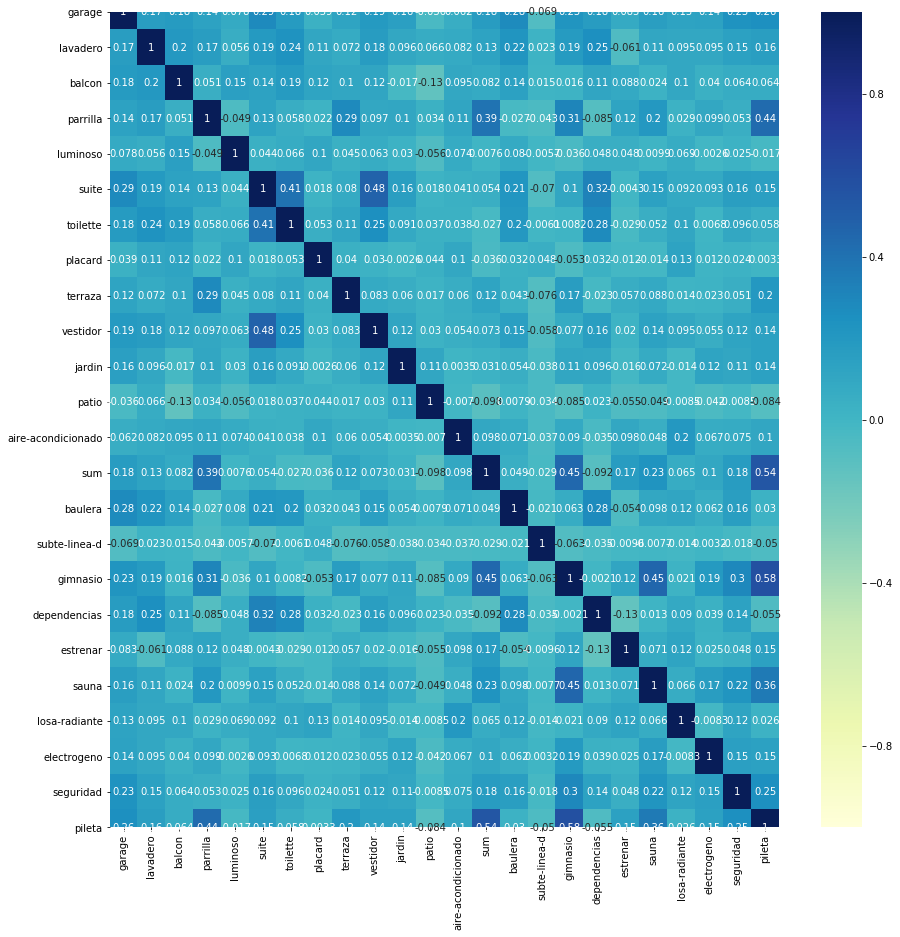

In [293]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(X_train[['garage',
       'lavadero', 'balcon', 'parrilla', 'luminoso', 'suite', 'toilette',
       'placard', 'terraza', 'vestidor', 'jardin', 'patio',
       'aire-acondicionado', 'sum', 'baulera', 'subte-linea-d',
       'gimnasio', 'dependencias', 'estrenar', 'sauna', 'losa-radiante',
       'electrogeno', 'seguridad', 'pileta']].corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu", annot=True)


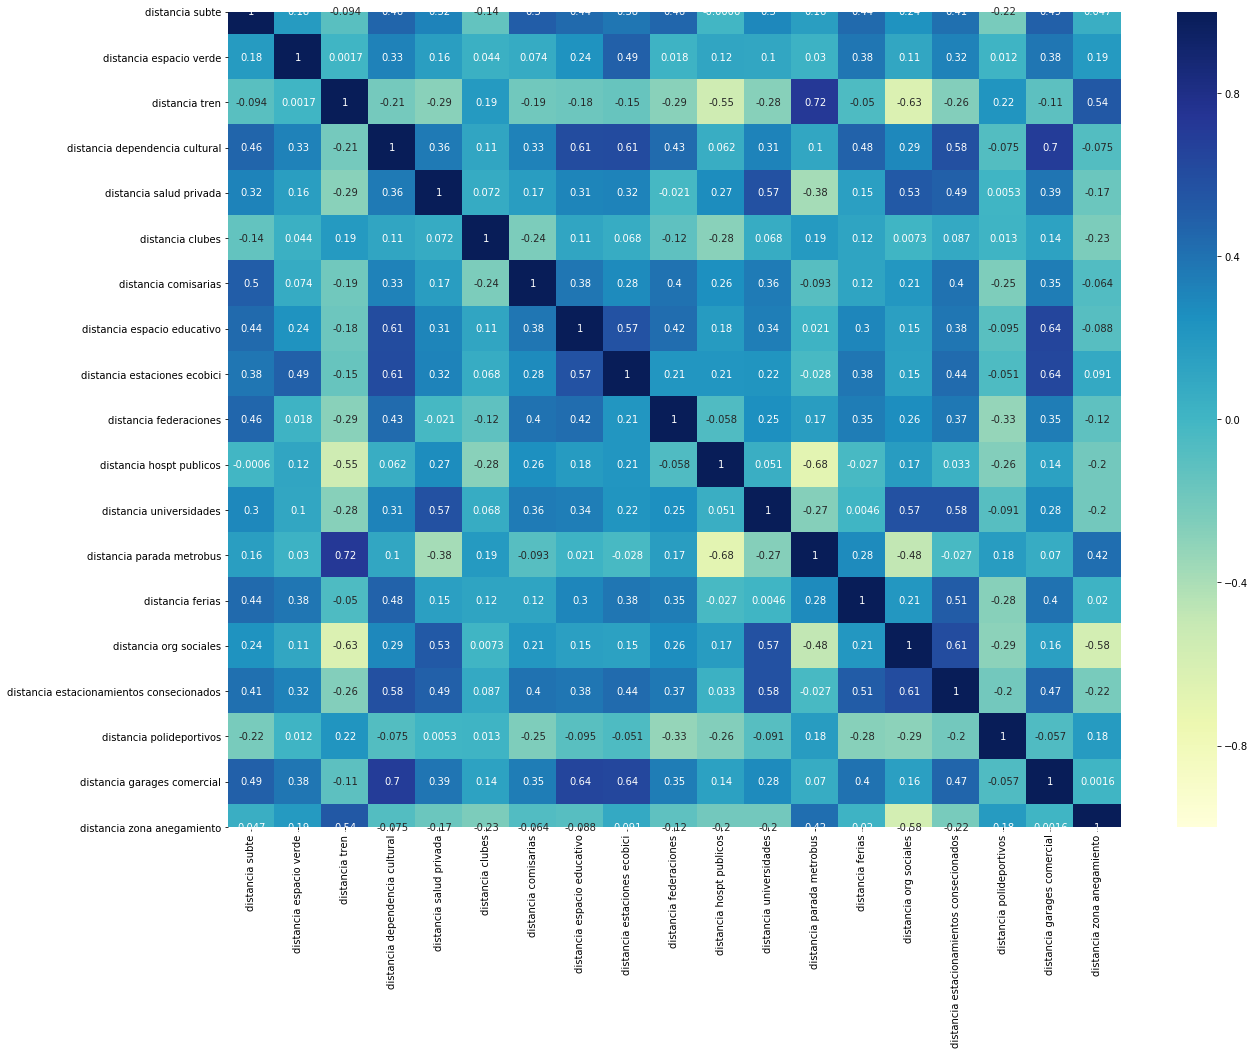

In [294]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(X_train[['distancia subte',
       'distancia espacio verde', 'distancia tren',
       'distancia dependencia cultural', 'distancia salud privada',
       'distancia clubes', 'distancia comisarias',
       'distancia espacio educativo', 'distancia estaciones ecobici',
       'distancia federaciones', 'distancia hospt publicos',
       'distancia universidades', 'distancia parada metrobus',
       'distancia ferias', 'distancia org sociales',
       'distancia estacionamientos consecionados', 'distancia polideportivos',
       'distancia garages comercial', 'distancia zona anegamiento']].corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu", annot=True)

In [295]:
X_train.head()

,property_type,place_name,surface_total_in_m2,surface_covered_in_m2,floor,rooms,distancia subte,distancia espacio verde,distancia tren,distancia dependencia cultural,...,subte-linea-d,gimnasio,dependencias,estrenar,sauna,losa-radiante,electrogeno,seguridad,pileta,price knn
105985,apartment,Palermo,31.0,27.0,3.0,3.0,609.092432,99.870242,417.734817,134.747798,...,1,1,0,0,0,0,1,1,1,3827.570561
64950,house,Belgrano,400.0,370.0,1.0,5.0,976.087250,210.021443,659.302509,438.505951,...,0,0,0,0,1,0,1,1,1,1978.241630
33225,apartment,Recoleta,41.0,41.0,4.0,1.0,258.399762,430.802101,2144.956275,178.719118,...,1,0,0,0,0,0,0,0,0,3070.137104
15269,apartment,Palermo,38.0,38.0,3.0,3.0,1178.768949,353.900796,1389.049483,79.949901,...,0,0,0,0,0,0,0,0,1,2504.576010
57171,apartment,Barrio Norte,148.0,135.0,3.0,4.0,632.402908,289.257425,2213.647052,112.028521,...,1,1,1,0,0,0,0,0,1,4226.677580


In [296]:
X_train_sink.shape

(5097, 50)

In [297]:
X_train_sink.head()

,property_type,place_name,surface_total_in_m2,surface_covered_in_m2,floor,rooms,distancia subte,distancia espacio verde,distancia tren,distancia dependencia cultural,...,baulera,subte-linea-d,gimnasio,dependencias,estrenar,sauna,losa-radiante,electrogeno,seguridad,pileta
105985,apartment,Palermo,31.0,27.0,3.0,3.0,609.092432,99.870242,417.734817,134.747798,...,0,1,1,0,0,0,0,1,1,1
64950,house,Belgrano,400.0,370.0,1.0,5.0,976.087250,210.021443,659.302509,438.505951,...,0,0,0,0,0,1,0,1,1,1
33225,apartment,Recoleta,41.0,41.0,4.0,1.0,258.399762,430.802101,2144.956275,178.719118,...,0,1,0,0,0,0,0,0,0,0
15269,apartment,Palermo,38.0,38.0,3.0,3.0,1178.768949,353.900796,1389.049483,79.949901,...,0,0,0,0,0,0,0,0,0,1
57171,apartment,Barrio Norte,148.0,135.0,3.0,4.0,632.402908,289.257425,2213.647052,112.028521,...,0,1,1,1,0,0,0,0,0,1


# transformo en un polinomio de grado 2

In [308]:
polyd=PolyDictVectorizer(sparse=False)
polyd.fit(X_train.to_dict('records'))
polin=polyd.transform_to_pandas(X_train)

In [298]:
polyd_sink=PolyDictVectorizer(sparse=False)
polyd_sink.fit(X_train_sink.to_dict('records'))
polin_sink=polyd_sink.transform_to_pandas(X_train_sink)

In [299]:
polin_sink.head()

,property_type=apartment,place_name=Palermo,surface_total_in_m2,surface_covered_in_m2,floor,rooms,distancia subte,distancia espacio verde,distancia tren,distancia dependencia cultural,...,property_type=store*terraza=1,dependencias=1*property_type=store,losa-radiante=1*property_type=store,property_type=PH*seguridad=1,jardin=1*property_type=store,estrenar=1*property_type=house,property_type=house*sum=1,losa-radiante=1*property_type=house,property_type=store*sauna=1,estrenar=1*property_type=PH
105985,1.0,1.0,31.0,27.0,3.0,3.0,609.092432,99.870242,417.734817,134.747798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64950,NaN,NaN,400.0,370.0,1.0,5.0,976.087250,210.021443,659.302509,438.505951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33225,1.0,NaN,41.0,41.0,4.0,1.0,258.399762,430.802101,2144.956275,178.719118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15269,1.0,1.0,38.0,38.0,3.0,3.0,1178.768949,353.900796,1389.049483,79.949901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57171,1.0,NaN,148.0,135.0,3.0,4.0,632.402908,289.257425,2213.647052,112.028521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [300]:
polin_sink=polin_sink.reindex(columns=polyd_sink.feature_names_)

In [309]:
polin=polin.reindex(columns=polyd.feature_names_)

In [310]:
polin.head()

,aire-acondicionado=0,aire-acondicionado=0*balcon=0,aire-acondicionado=0*balcon=1,aire-acondicionado=0*baulera=0,aire-acondicionado=0*baulera=1,aire-acondicionado=0*dependecias=0,aire-acondicionado=0*dependencias=0,aire-acondicionado=0*dependencias=1,aire-acondicionado=0*distancia clubes,aire-acondicionado=0*distancia comisarias,...,terraza=1*vestidor=0,terraza=1*vestidor=1,toilette=0,toilette=0*vestidor=0,toilette=0*vestidor=1,toilette=1,toilette=1*vestidor=0,toilette=1*vestidor=1,vestidor=0,vestidor=1
105985,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,70.350268,1031.082325,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
64950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
33225,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,842.840278,531.723395,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
15269,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,266.061167,1119.792503,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
57171,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1069.626480,881.781229,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN


In [301]:
polin_sink.head()

,aire-acondicionado=0,aire-acondicionado=0*balcon=0,aire-acondicionado=0*balcon=1,aire-acondicionado=0*baulera=0,aire-acondicionado=0*baulera=1,aire-acondicionado=0*dependecias=0,aire-acondicionado=0*dependencias=0,aire-acondicionado=0*dependencias=1,aire-acondicionado=0*distancia clubes,aire-acondicionado=0*distancia comisarias,...,terraza=1*vestidor=0,terraza=1*vestidor=1,toilette=0,toilette=0*vestidor=0,toilette=0*vestidor=1,toilette=1,toilette=1*vestidor=0,toilette=1*vestidor=1,vestidor=0,vestidor=1
105985,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,70.350268,1031.082325,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
64950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
33225,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,842.840278,531.723395,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
15269,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,266.061167,1119.792503,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
57171,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1069.626480,881.781229,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN


In [302]:
polin_sink.fillna(0,inplace=True)

In [311]:
polin.fillna(0,inplace=True)

In [ ]:
polin.to_csv(r'C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 2\polin_train.csv')

In [ ]:
polin_sink.to_csv(r'C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 2\polin_sink_train.csv')

In [312]:
polin_sink.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [313]:
polin.head()

,aire-acondicionado=0,aire-acondicionado=0*balcon=0,aire-acondicionado=0*balcon=1,aire-acondicionado=0*baulera=0,aire-acondicionado=0*baulera=1,aire-acondicionado=0*dependecias=0,aire-acondicionado=0*dependencias=0,aire-acondicionado=0*dependencias=1,aire-acondicionado=0*distancia clubes,aire-acondicionado=0*distancia comisarias,...,terraza=1*vestidor=0,terraza=1*vestidor=1,toilette=0,toilette=0*vestidor=0,toilette=0*vestidor=1,toilette=1,toilette=1*vestidor=0,toilette=1*vestidor=1,vestidor=0,vestidor=1
105985,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,70.350268,1031.082325,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
64950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
33225,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,842.840278,531.723395,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
15269,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,266.061167,1119.792503,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
57171,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1069.626480,881.781229,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [314]:
ss=StandardScaler()

In [303]:
ss_sink=StandardScaler()

In [315]:
polin=ss.fit_transform(polin)

In [304]:
polin_sink=ss_sink.fit_transform(polin_sink)

In [316]:
print(polin.mean())
print(polin.std())

1.5649725415931543e-18
0.9998486110051129


In [305]:
print(polin_sink.mean())
print(polin_sink.std())

1.631863356736778e-18
0.9998447566551233


In [ ]:
polyd_sink.feature_names_

In [ ]:
polin.shape

In [ ]:
polin_sink.shape

In [ ]:
#polin=pd.DataFrame(polin)

In [ ]:
#polin_sk=pd.DataFrame(polin_sk)

In [ ]:
#polin.to_csv(r'C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 2\polin_train.csv')
#polin_sk.to_csv(r'C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 2\polin_sk_train.csv')

In [ ]:
polin_sk

# Vamos a Probar algunos Modelos

In [306]:
cv = KFold(5, shuffle=True)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

# Regresion lineal en polinomio de grado 2

In [ ]:
lm =LinearRegression()
model_2 = lm.fit(polin, y_train)
y_pred_tr_lm = model_2.predict(polin)
scores = cross_val_score(lm, polin, y_train, cv=5, scoring='r2')
print('scores:',scores)
print('promedio de R2 sobre validation set:',scores.mean())
print('Desvio de R2 sobre validation set:',scores.std())
print("Para el train set:")
print_metrics(y_train,y_pred_tr_lm)

# Regresion lineal en polinomio de grado 2 para dataset sin KNN

In [ ]:
lm_sk =LinearRegression()
model_lr_sk = lm_sk.fit(polin_sk,y_train)
y_pred_tr_lm_sk = model_lr_sk.predict(polin_sk)
scores = cross_val_score(lm_sk, polin_sk, y_train, cv=5, scoring='r2')
print('scores:',scores)
print('promedio de R2 sobre validation set:',scores.mean())
print('Desvio de R2 sobre validation set:',scores.std())
print("Para el train set:")
print_metrics(y_train,y_pred_tr_lm_sk)

# Regresion ridge polimonio grado 2

In [ ]:
lm_ridge = RidgeCV(alphas=np.linspace(1000,1800, 100),cv=5, normalize=False) 
model_ridge = lm_ridge.fit(polin, y_train)
y_pred_tr_lr = model_ridge.predict(polin)
scores = cross_val_score(lm_ridge, polin, y_train, cv=5, scoring='r2')
print('Scores:',scores)
print('Promedio de R2 sobre validation set:',scores.mean())
print('Desvio de R2 sobre validation set:',scores.std())
print('Alpha optimo',lm_ridge.alpha_)
print("Para el train set:")
print_metrics(y_train,y_pred_tr_lr)

# Regresion ridge polimonio grado 2 sin kNN


In [ ]:
lm_ridge_sk = RidgeCV(alphas=np.linspace(1000,1800, 10),cv=5, normalize=False)
model_ridge_sk = lm_ridge.fit(polin_sk, y_train)
y_pred_tr_lr_sk = model_ridge.predict(polin_sk)
scores = cross_val_score(lm_ridge_sk, polin_sk, y_train, cv=5, scoring='r2')
print('Scores:',scores)
print('Promedio de R2 sobre validation set:',scores.mean())
print('Desvio de R2 sobre validation set:',scores.std())
print('Alpha optimo',lm_ridge.alpha_)
print("Para el train set:")
print_metrics(y_train,y_pred_tr_lr_sk)

In [ ]:
polin_sk.shape

# Regresion Lasso polimonio grado 2

In [317]:
lm_lasso= LassoCV(alphas=np.linspace(5,8, 10),cv=5, normalize=False,verbose=1,max_iter=5000)
model_lasso = lm_lasso.fit(polin, y_train)
y_pred_tr_ls = model_lasso.predict(polin)
scores = cross_val_score(lm_lasso, polin, y_train, cv=5, scoring='r2')
print('scores:',scores)
print('Promedio de R2 sobre validation set:',scores.mean())
print('Desvio de R2 sobre validation set:',scores.std())
print('Alpha optimo',lm_lasso.alpha_)
print("Para el train set:")
print_metrics(y_train,y_pred_tr_ls)
#print('Coef Beta:',(lm_lasso.coef_))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
..................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
..................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
..................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
..................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
..................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.7min fini

scores: [0.60650947 0.50357375 0.58680825 0.5329257  0.46778447]
Promedio de R2 sobre validation set: 0.5395203257297204
Desvio de R2 sobre validation set: 0.0513913851282181
Alpha optimo 5.333333333333333
Para el train set:
MAE: 529.971032
MSE: 643188.283198
RMSE: 801.990201
R2: 0.6996


In [ ]:
#alpha en log space= "Alpha optimo 10.0"

# Regresion Lasso polimonio grado 2 sin KNN


In [318]:
lm_lasso_sk = LassoCV(alphas=np.linspace(5,8, 50),cv=5, normalize=False,verbose=1,max_iter=5000)
model_lasso_sk = lm_lasso_sk.fit(polin_sink, y_train)
y_pred_tr_ls_sk = model_lasso_sk.predict(polin_sink)
scores = cross_val_score(lm_lasso_sk, polin_sink, y_train, cv=5, scoring='r2')
print('scores:',scores)
print('Promedio de R2 sobre validation set:',scores.mean())
print('Desvio de R2 sobre validation set:',scores.std())
print('Alpha optimo',lm_lasso_sk.alpha_)
print("Para el train set:")
print_metrics(y_train,y_pred_tr_ls_sk)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
..........................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
..........................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.....................................................................................................................

scores: [0.50687341 0.42532122 0.47013567 0.4478985  0.39389182]
Promedio de R2 sobre validation set: 0.4488241236440692
Desvio de R2 sobre validation set: 0.03845699570737274
Alpha optimo 6.285714285714286
Para el train set:
MAE: 569.501757
MSE: 791218.466546
RMSE: 889.504619
R2: 0.6304


In [ ]:
#polin.to_csv(r'C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 2\polin_train.csv')
#polin_sk.to_csv(r'C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 2\polin_sk_train.csv')

# Guardo los modelos fiteados

In [319]:
filelasso = 'finalized_model_lasso.sav'
pickle.dump(model_lasso, open(filelasso, 'wb'))
#fileridge = 'finalized_model_ridge.sav'
#pickle.dump(model_ridge, open(fileridge, 'wb'))
filelasso_sk = 'finalized_model_lasso_sk.sav'
pickle.dump(model_lasso_sk, open(filelasso_sk, 'wb'))

In [ ]:
#load the model from disk
#model_lasso = pickle.load(open('finalized_model_lasso.sav', 'rb'))
#model_lasso_sk = pickle.load(open('finalized_model_lasso_sk.sav', 'rb'))
#model_ridge = pickle.load(open('finalized_model_ridge.sav', 'rb'))

# Trabajo sobre el Test Set

In [320]:
test.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,Q_Ambientes,ambiente_texto,ambiente_texto_valor,seguridad,pileta,met2,met2_t,dif_m2_sup_regex,dif_m2_sup_regex_t,usd_met2
82576,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.5881821098,-58.4146691528",-34.588182,-58.414669,...,4.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,2285.714286
91598,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5698671194,-58.4575811912",-34.569867,-58.457581,...,NaN,cuatro,4.0,0,1,NaN,NaN,NaN,NaN,3974.209444
21167,sell,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,3429595.0,"-34.58702,-58.400611",-34.587020,-58.400611,...,NaN,NaN,NaN,0,0,48.0,NaN,-20.0,NaN,2857.142857
25218,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5739452,-58.4377082",-34.573945,-58.437708,...,2.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,2030.769231
82186,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5622109457,-58.4425154169",-34.562211,-58.442515,...,3.0,NaN,NaN,1,0,177.0,NaN,-11.0,NaN,5170.454545


In [321]:
#test.drop(columns=['rooms_y','rooms_x','floor_y','rooms_y','rooms'],inplace=True)

In [322]:
test.shape

(1283, 79)

In [323]:
test.columns

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'distancia subte',
       'distancia espacio verde', 'distancia tren',
       'distancia dependencia cultural', 'distancia salud privada',
       'distancia clubes', 'distancia comisarias',
       'distancia espacio educativo', 'distancia estaciones ecobici',
       'distancia federaciones', 'distancia hospt publicos',
       'distancia universidades', 'distancia parada metrobus',
       'distancia ferias', 'distancia org sociales',
       'distancia estacionamientos consecionados', 'distancia polideportivos',
       'distancia garages comercial', 'distancia zona ane

In [324]:
test.isnull().sum()

operation                     0
property_type                 0
place_name                    0
place_with_parent_names       0
country_name                  0
                           ... 
met2                        947
met2_t                     1249
dif_m2_sup_regex            960
dif_m2_sup_regex_t         1249
usd_met2                      0
Length: 79, dtype: int64

In [325]:
test.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,...,piso_°,Q_Ambientes,ambiente_texto_valor,seguridad,pileta,met2,met2_t,dif_m2_sup_regex,dif_m2_sup_regex_t,usd_met2
count,1.199000e+03,1283.000000,1283.000000,1.283000e+03,1.283000e+03,1.283000e+03,1283.000000,1283.000000,1283.000000,1224.000000,...,24.000000,747.000000,322.000000,1283.000000,1283.000000,336.000000,34.000000,323.000000,34.000000,1283.000000
mean,3.432804e+06,-34.580255,-58.424980,4.331182e+05,6.294586e+06,3.567449e+05,107.180436,96.359314,3245.002698,5075.387089,...,7.000000,2.876841,2.071429,0.158223,0.237724,70.407738,82.029412,30.814241,-1.882353,3245.002698
std,3.041687e+03,0.013847,0.024729,7.490908e+05,7.917462e+06,4.487213e+05,103.599333,88.556357,1529.959500,9758.555152,...,3.216804,1.093896,0.852625,0.365092,0.425855,81.568855,57.509675,75.751163,21.865657,1529.959500
min,3.429595e+06,-34.634479,-58.542461,1.300000e+04,2.293785e+05,1.300000e+04,12.000000,4.000000,217.098065,684.210526,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-173.000000,-43.000000,217.098065
25%,3.430234e+06,-34.591249,-58.443935,1.426025e+05,2.417296e+06,1.370000e+05,50.500000,42.000000,2469.669118,2750.000000,...,6.000000,2.000000,1.000000,0.000000,0.000000,24.000000,43.500000,-5.000000,-10.750000,2469.669118
50%,3.430234e+06,-34.583157,-58.423519,2.390000e+05,4.040590e+06,2.290000e+05,74.000000,67.000000,2941.860465,3250.000000,...,8.000000,3.000000,2.000000,0.000000,0.000000,48.000000,66.000000,0.000000,-4.500000,2941.860465
75%,3.436077e+06,-34.568368,-58.404019,4.200000e+05,6.881355e+06,3.900000e+05,123.500000,116.000000,3634.875260,4138.604526,...,9.000000,4.000000,3.000000,0.000000,0.000000,81.250000,108.250000,53.000000,0.000000,3634.875260
max,3.436109e+06,-34.544436,-58.359591,1.147967e+07,1.093959e+08,6.200000e+06,1556.000000,970.000000,18787.878788,143860.714286,...,13.000000,8.000000,6.000000,1.000000,1.000000,556.000000,232.000000,422.000000,69.000000,18787.878788


In [326]:
test[['floor','surface_covered_in_m2','surface_total_in_m2']].describe()

,floor,surface_covered_in_m2,surface_total_in_m2
count,251.000000,1283.000000,1283.000000
mean,4.641434,96.359314,107.180436
std,7.207698,88.556357,103.599333
min,1.000000,4.000000,12.000000
25%,1.000000,42.000000,50.500000
50%,3.000000,67.000000,74.000000
75%,7.000000,116.000000,123.500000
max,102.000000,970.000000,1556.000000


# Outlier Trim Transform

surf=trim.fit_transform(prope)


In [327]:
surf_t=trim.transform(test)
test[['floor','surface_covered_in_m2','surface_total_in_m2']]=surf_t
del (surf_t)

In [328]:
test[['floor','surface_covered_in_m2','surface_total_in_m2']].describe()

,floor,surface_covered_in_m2,surface_total_in_m2
count,251.000000,1283.000000,1283.000000
mean,4.294821,94.191738,103.672253
std,3.735336,76.698075,81.969737
min,1.000000,23.000000,25.000000
25%,1.000000,42.000000,50.500000
50%,3.000000,67.000000,74.000000
75%,7.000000,116.000000,123.500000
max,22.000000,370.000000,400.000000


# kNN Regressor Transform

In [329]:
x_te=pd.concat([test['lat'],test['lon']],axis=1)


x=ss_kn.fit_transform(x)

In [332]:
x_te=ss_knn_prope.transform(x_te)

In [333]:
print(x_te.mean())
print(x_te.std())

-0.0009052516372197862
1.0056324695716676


In [334]:
test['price knn']=knreg.predict(x_te)

In [335]:
test[['property_type','place_name','price_usd_per_m2','price knn']].head()

,property_type,place_name,price_usd_per_m2,price knn
82576,apartment,Palermo,2285.714286,3204.704887
91598,apartment,Belgrano,3974.209444,3623.960954
21167,apartment,Recoleta,2857.142857,2932.760794
25218,apartment,Belgrano,2030.769231,2777.091253
82186,apartment,Belgrano,5170.454545,3223.132348


# Imputacion Rooms & Floor con Mediana de Train

In [336]:
test.isnull().sum()

operation                     0
property_type                 0
place_name                    0
place_with_parent_names       0
country_name                  0
                           ... 
met2_t                     1249
dif_m2_sup_regex            960
dif_m2_sup_regex_t         1249
usd_met2                      0
price knn                     0
Length: 80, dtype: int64

In [337]:
median_train_rooms_2=median_train_rooms.reset_index()

In [338]:
median_train_floor_2=median_train_floor.reset_index()


In [339]:
median_train_rooms_2

,place_name,property_type,rooms
0,Barrio Norte,PH,3.5
1,Barrio Norte,apartment,3.0
2,Barrio Norte,house,2.5
3,Barrio Norte,store,NaN
4,Belgrano,PH,3.0
5,Belgrano,apartment,3.0
6,Belgrano,house,5.0
7,Belgrano,store,1.0
8,Palermo,PH,3.0
9,Palermo,apartment,3.0


In [340]:
median_train_floor_2

,place_name,property_type,floor
0,Barrio Norte,PH,2.5
1,Barrio Norte,apartment,3.0
2,Barrio Norte,house,11.5
3,Barrio Norte,store,1.5
4,Belgrano,PH,1.5
5,Belgrano,apartment,4.0
6,Belgrano,house,1.0
7,Belgrano,store,1.0
8,Palermo,PH,1.0
9,Palermo,apartment,3.0


In [341]:
test=pd.merge(test,median_train_rooms_2,on=['place_name','property_type'],how='left')

In [342]:
test.columns

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms_x', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'distancia subte',
       'distancia espacio verde', 'distancia tren',
       'distancia dependencia cultural', 'distancia salud privada',
       'distancia clubes', 'distancia comisarias',
       'distancia espacio educativo', 'distancia estaciones ecobici',
       'distancia federaciones', 'distancia hospt publicos',
       'distancia universidades', 'distancia parada metrobus',
       'distancia ferias', 'distancia org sociales',
       'distancia estacionamientos consecionados', 'distancia polideportivos',
       'distancia garages comercial', 'distancia zona a

In [343]:
test.rename(columns={'rooms_x':'rooms'},inplace=True)

In [344]:
test['rooms'].fillna(test['rooms_y'],inplace=True)

In [345]:
test['rooms'].describe()

count    1273.000000
mean        3.130401
std         1.359324
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: rooms, dtype: float64

In [346]:
test.shape

(1283, 81)

In [347]:
test=pd.merge(test,median_train_floor_2,on=['place_name','property_type'],how='left')

In [348]:
test.rename(columns={'floor_x':'floor'},inplace=True)

In [349]:
test['floor'].fillna(test['floor_y'],inplace=True)

In [350]:
test=test[test['floor'].notnull()]

In [351]:
test.isnull().sum()

operation                     0
property_type                 0
place_name                    0
place_with_parent_names       0
country_name                  0
                           ... 
dif_m2_sup_regex_t         1248
usd_met2                      0
price knn                     0
rooms_y                      10
floor_y                       0
Length: 82, dtype: int64

In [352]:
test.columns

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'distancia subte',
       'distancia espacio verde', 'distancia tren',
       'distancia dependencia cultural', 'distancia salud privada',
       'distancia clubes', 'distancia comisarias',
       'distancia espacio educativo', 'distancia estaciones ecobici',
       'distancia federaciones', 'distancia hospt publicos',
       'distancia universidades', 'distancia parada metrobus',
       'distancia ferias', 'distancia org sociales',
       'distancia estacionamientos consecionados', 'distancia polideportivos',
       'distancia garages comercial', 'distancia zona ane

In [353]:
prope.shape

(5097, 52)

In [354]:
prope.describe()

,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,distancia subte,distancia espacio verde,distancia tren,distancia dependencia cultural,distancia salud privada,...,subte-linea-d,gimnasio,dependencias,estrenar,sauna,losa-radiante,electrogeno,seguridad,pileta,price knn
count,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,...,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000
mean,106.411418,96.430057,3220.590097,3.547969,3.123896,559.480154,169.779403,1105.591467,121.544427,507.212702,...,0.612517,0.151462,0.243084,0.085737,0.062978,0.060624,0.031587,0.165588,0.257014,3235.099120
std,82.868668,77.404335,1463.358763,2.144300,1.361871,366.974517,132.128242,591.582968,125.537530,387.496815,...,0.487223,0.358533,0.428988,0.280002,0.242948,0.238663,0.174916,0.371746,0.437030,785.305446
min,25.000000,23.000000,84.125500,1.000000,1.000000,1.553595,0.000000,37.911932,0.278565,10.028539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1527.376760
25%,51.000000,43.000000,2466.216216,3.000000,2.000000,281.457035,81.777137,607.872438,57.653455,230.028740,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2716.673691
50%,77.000000,70.000000,2957.446809,3.000000,3.000000,520.070040,152.091108,1033.826938,105.502457,401.901372,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3109.902194
75%,128.000000,121.000000,3600.000000,4.000000,4.000000,794.317592,234.862445,1636.894470,156.080960,676.048244,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3558.741355
max,400.000000,370.000000,19950.000000,22.000000,17.000000,5374.776793,2617.921985,2594.989902,3353.577014,5023.881643,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7933.076060


In [355]:
test.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,...,seguridad,pileta,met2,met2_t,dif_m2_sup_regex,dif_m2_sup_regex_t,usd_met2,price knn,rooms_y,floor_y
count,1.198000e+03,1282.000000,1282.000000,1.282000e+03,1.282000e+03,1.282000e+03,1282.000000,1282.000000,1282.000000,1223.000000,...,1282.000000,1282.000000,336.000000,34.000000,323.000000,34.000000,1282.000000,1282.000000,1272.000000,1282.000000
mean,3.432807e+06,-34.580243,-58.425005,4.330271e+05,6.291927e+06,3.565942e+05,103.671217,94.164587,3243.448767,5076.051518,...,0.158346,0.237129,70.407738,82.029412,30.814241,-1.882353,3243.448767,3209.417730,3.228381,3.279641
std,3.041542e+03,0.013847,0.024723,7.493760e+05,7.919979e+06,4.488639e+05,82.001717,76.721837,1529.543361,9762.519500,...,0.365208,0.425488,81.568855,57.509675,75.751163,21.865657,1529.543361,782.852060,0.551734,0.855254
min,3.429595e+06,-34.634479,-58.542461,1.300000e+04,2.293785e+05,1.300000e+04,25.000000,23.000000,217.098065,684.210526,...,0.000000,0.000000,1.000000,1.000000,-173.000000,-43.000000,217.098065,1587.017214,1.000000,1.000000
25%,3.430234e+06,-34.591244,-58.443935,1.424038e+05,2.417296e+06,1.370000e+05,50.250000,42.000000,2469.209559,2750.000000,...,0.000000,0.000000,24.000000,43.500000,-5.000000,-10.750000,2469.209559,2708.993963,3.000000,3.000000
50%,3.430234e+06,-34.583146,-58.423519,2.385000e+05,4.040590e+06,2.290000e+05,74.000000,67.000000,2941.518468,3250.000000,...,0.000000,0.000000,48.000000,66.000000,0.000000,-4.500000,2941.518468,3089.859816,3.000000,3.000000
75%,3.436077e+06,-34.568324,-58.404019,4.200000e+05,6.881355e+06,3.900000e+05,123.750000,116.000000,3634.498124,4135.632184,...,0.000000,0.000000,81.250000,108.250000,53.000000,0.000000,3634.498124,3561.907332,3.000000,4.000000
max,3.436109e+06,-34.544436,-58.359591,1.147967e+07,1.093959e+08,6.200000e+06,400.000000,370.000000,18787.878788,143860.714286,...,1.000000,1.000000,556.000000,232.000000,422.000000,69.000000,18787.878788,7933.076060,5.000000,11.500000


In [356]:
#test.drop(columns=['lat','lon','floor_y','rooms_y'],inplace=True)

In [357]:
test.drop(columns=['met2','met2_t','geonames_id','operation','country_name','state_name','place_with_parent_names','lat-lon','properati_url','image_thumbnail','expenses','piso_n', 'piso_°', 'Q_Ambientes', 'ambiente_texto',
       'ambiente_texto_valor','dif_m2_sup_regex', 'dif_m2_sup_regex_t', 'usd_met2','price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd','description', 'title','price_per_m2','lat','lon','rooms_y','floor_y'],inplace=True)

In [358]:
test.columns

Index(['property_type', 'place_name', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms',
       'distancia subte', 'distancia espacio verde', 'distancia tren',
       'distancia dependencia cultural', 'distancia salud privada',
       'distancia clubes', 'distancia comisarias',
       'distancia espacio educativo', 'distancia estaciones ecobici',
       'distancia federaciones', 'distancia hospt publicos',
       'distancia universidades', 'distancia parada metrobus',
       'distancia ferias', 'distancia org sociales',
       'distancia estacionamientos consecionados', 'distancia polideportivos',
       'distancia garages comercial', 'distancia zona anegamiento', 'garage',
       'lavadero', 'balcon', 'parrilla', 'luminoso', 'suite', 'toilette',
       'placard', 'terraza', 'vestidor', 'jardin', 'patio',
       'aire-acondicionado', 'dependecias', 'sum', 'baulera', 'subte-linea-d',
       'gimnasio', 'dependencias', 'estrenar', 'sauna', 'losa-

In [359]:
test.shape

(1282, 52)

In [360]:
test.isnull().sum()

property_type                                0
place_name                                   0
surface_total_in_m2                          0
surface_covered_in_m2                        0
price_usd_per_m2                             0
floor                                        0
rooms                                       10
distancia subte                              0
distancia espacio verde                      0
distancia tren                               0
distancia dependencia cultural               0
distancia salud privada                      0
distancia clubes                             0
distancia comisarias                         0
distancia espacio educativo                  0
distancia estaciones ecobici                 0
distancia federaciones                       0
distancia hospt publicos                     0
distancia universidades                      0
distancia parada metrobus                    0
distancia ferias                             0
distancia org

In [361]:
test=test[test['floor'].notnull()]

In [362]:
test=test[test['rooms'].notnull()]

In [363]:
prope.describe()

,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,distancia subte,distancia espacio verde,distancia tren,distancia dependencia cultural,distancia salud privada,...,subte-linea-d,gimnasio,dependencias,estrenar,sauna,losa-radiante,electrogeno,seguridad,pileta,price knn
count,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,...,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000
mean,106.411418,96.430057,3220.590097,3.547969,3.123896,559.480154,169.779403,1105.591467,121.544427,507.212702,...,0.612517,0.151462,0.243084,0.085737,0.062978,0.060624,0.031587,0.165588,0.257014,3235.099120
std,82.868668,77.404335,1463.358763,2.144300,1.361871,366.974517,132.128242,591.582968,125.537530,387.496815,...,0.487223,0.358533,0.428988,0.280002,0.242948,0.238663,0.174916,0.371746,0.437030,785.305446
min,25.000000,23.000000,84.125500,1.000000,1.000000,1.553595,0.000000,37.911932,0.278565,10.028539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1527.376760
25%,51.000000,43.000000,2466.216216,3.000000,2.000000,281.457035,81.777137,607.872438,57.653455,230.028740,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2716.673691
50%,77.000000,70.000000,2957.446809,3.000000,3.000000,520.070040,152.091108,1033.826938,105.502457,401.901372,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3109.902194
75%,128.000000,121.000000,3600.000000,4.000000,4.000000,794.317592,234.862445,1636.894470,156.080960,676.048244,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3558.741355
max,400.000000,370.000000,19950.000000,22.000000,17.000000,5374.776793,2617.921985,2594.989902,3353.577014,5023.881643,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7933.076060


In [364]:
test.describe()

,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,distancia subte,distancia espacio verde,distancia tren,distancia dependencia cultural,distancia salud privada,...,subte-linea-d,gimnasio,dependencias,estrenar,sauna,losa-radiante,electrogeno,seguridad,pileta,price knn
count,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,...,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,103.938286,94.362421,3229.460211,3.514151,3.129717,571.576161,172.746674,1104.955411,121.602510,522.758188,...,0.606132,0.140723,0.242925,0.068396,0.057390,0.047170,0.026730,0.159591,0.238994,3211.251608
std,82.148880,76.811915,1509.338427,1.859279,1.359640,363.698287,143.054726,583.580852,123.288841,381.249646,...,0.488798,0.347873,0.429019,0.252524,0.232678,0.212085,0.161355,0.366371,0.426637,784.882528
min,25.000000,23.000000,217.098065,1.000000,1.000000,0.494001,0.000000,40.437544,0.136179,20.689934,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1587.017214
25%,51.000000,42.000000,2468.750000,3.000000,2.000000,288.154845,81.777137,629.978779,57.804164,233.509875,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2709.100679
50%,74.000000,67.000000,2938.673342,3.000000,3.000000,539.924435,153.540731,1008.841464,105.732017,418.582723,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3090.242858
75%,124.000000,116.000000,3623.205030,4.000000,4.000000,806.406851,236.696948,1600.292615,158.195017,706.903986,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3562.852884
max,400.000000,370.000000,18787.878788,22.000000,12.000000,5432.282179,3214.617956,2613.028885,3366.505632,4339.903958,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7933.076060


# Generacion de X e Y Test

In [365]:
X_test=test.drop(columns='price_usd_per_m2')
y_test=test['price_usd_per_m2']

In [366]:
X_test_sink=test.drop(columns=['price_usd_per_m2','price knn'])

In [367]:
X_train.shape

(5097, 51)

In [368]:
X_test.shape

(1272, 51)

In [369]:
X_train.columns==X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [370]:
X_test.columns

Index(['property_type', 'place_name', 'surface_total_in_m2',
       'surface_covered_in_m2', 'floor', 'rooms', 'distancia subte',
       'distancia espacio verde', 'distancia tren',
       'distancia dependencia cultural', 'distancia salud privada',
       'distancia clubes', 'distancia comisarias',
       'distancia espacio educativo', 'distancia estaciones ecobici',
       'distancia federaciones', 'distancia hospt publicos',
       'distancia universidades', 'distancia parada metrobus',
       'distancia ferias', 'distancia org sociales',
       'distancia estacionamientos consecionados', 'distancia polideportivos',
       'distancia garages comercial', 'distancia zona anegamiento', 'garage',
       'lavadero', 'balcon', 'parrilla', 'luminoso', 'suite', 'toilette',
       'placard', 'terraza', 'vestidor', 'jardin', 'patio',
       'aire-acondicionado', 'dependecias', 'sum', 'baulera', 'subte-linea-d',
       'gimnasio', 'dependencias', 'estrenar', 'sauna', 'losa-radiante',
       'e

In [371]:
X_train_sink.shape

(5097, 50)

In [372]:
X_test_sink.shape

(1272, 50)

In [373]:
X_train_sink.columns

Index(['property_type', 'place_name', 'surface_total_in_m2',
       'surface_covered_in_m2', 'floor', 'rooms', 'distancia subte',
       'distancia espacio verde', 'distancia tren',
       'distancia dependencia cultural', 'distancia salud privada',
       'distancia clubes', 'distancia comisarias',
       'distancia espacio educativo', 'distancia estaciones ecobici',
       'distancia federaciones', 'distancia hospt publicos',
       'distancia universidades', 'distancia parada metrobus',
       'distancia ferias', 'distancia org sociales',
       'distancia estacionamientos consecionados', 'distancia polideportivos',
       'distancia garages comercial', 'distancia zona anegamiento', 'garage',
       'lavadero', 'balcon', 'parrilla', 'luminoso', 'suite', 'toilette',
       'placard', 'terraza', 'vestidor', 'jardin', 'patio',
       'aire-acondicionado', 'dependecias', 'sum', 'baulera', 'subte-linea-d',
       'gimnasio', 'dependencias', 'estrenar', 'sauna', 'losa-radiante',
       'e

In [374]:
X_test_sink.columns

Index(['property_type', 'place_name', 'surface_total_in_m2',
       'surface_covered_in_m2', 'floor', 'rooms', 'distancia subte',
       'distancia espacio verde', 'distancia tren',
       'distancia dependencia cultural', 'distancia salud privada',
       'distancia clubes', 'distancia comisarias',
       'distancia espacio educativo', 'distancia estaciones ecobici',
       'distancia federaciones', 'distancia hospt publicos',
       'distancia universidades', 'distancia parada metrobus',
       'distancia ferias', 'distancia org sociales',
       'distancia estacionamientos consecionados', 'distancia polideportivos',
       'distancia garages comercial', 'distancia zona anegamiento', 'garage',
       'lavadero', 'balcon', 'parrilla', 'luminoso', 'suite', 'toilette',
       'placard', 'terraza', 'vestidor', 'jardin', 'patio',
       'aire-acondicionado', 'dependecias', 'sum', 'baulera', 'subte-linea-d',
       'gimnasio', 'dependencias', 'estrenar', 'sauna', 'losa-radiante',
       'e

In [375]:
X_train_sink.columns==X_test_sink.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [376]:
X_test_sink.shape

(1272, 50)

In [377]:
print(X_train_sink.shape)
print(X_test_sink.shape)

(5097, 50)
(1272, 50)


In [379]:
polyd.transform(X_test.to_dict('records'))
polin_t=polyd._transform(X_test, fitting=False)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [380]:
polyd_sink.transform(X_test_sink.to_dict('records'))
polin_t_sink=polyd_sink._transform(X_test_sink, fitting=False)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [381]:
polin_t_sink_d=pd.DataFrame(polin_t_sink)

In [382]:
polin_t_d=pd.DataFrame(polin_t)

In [383]:
polin_t_sink_d.head()

,0,1,2,3,4,5,6,7,8,9,...,3211,3212,3213,3214,3215,3216,3217,3218,3219,3220
0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,142.031961,125.764702,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,373.459547,1085.092120,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1355.458446,884.212305,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,857.509330,134.515315,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,149.775699,832.025397,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [384]:
polin_t_d.head()

,0,1,2,3,4,5,6,7,8,9,...,3293,3294,3295,3296,3297,3298,3299,3300,3301,3302
0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,142.031961,125.764702,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,373.459547,1085.092120,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1355.458446,884.212305,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,857.509330,134.515315,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,149.775699,832.025397,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [385]:
polin_t_sink_d=polin_t_sink_d.fillna(0)

In [386]:
polin_t_d=polin_t_d.fillna(0)

In [387]:
polin_t_d.head()

,0,1,2,3,4,5,6,7,8,9,...,3293,3294,3295,3296,3297,3298,3299,3300,3301,3302
0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,142.031961,125.764702,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,373.459547,1085.092120,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1355.458446,884.212305,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,857.509330,134.515315,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,149.775699,832.025397,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [388]:
polin_t_sink_d.head()

,0,1,2,3,4,5,6,7,8,9,...,3211,3212,3213,3214,3215,3216,3217,3218,3219,3220
0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,142.031961,125.764702,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,373.459547,1085.092120,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1355.458446,884.212305,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,857.509330,134.515315,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,149.775699,832.025397,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
polin_t_sink_d.shape

numpy.nan_to_num(x, copy=True, nan=0.0, posinf=None, neginf=None)[source]
Replace NaN with zero and infinity with large finite numbers (default behaviour) or with the numbers defined by the user using the nan, posinf and/or neginf keywords

In [ ]:
polin_sink.mean()

In [ ]:
polin_t_sink_d.mean()

In [389]:
polin_t_d=ss.transform(polin_t_d)

In [390]:
polin_t_sink_d=ss_sink.transform(polin_t_sink_d)

In [391]:
print(polin_t_d.mean())
print(polin_t_d.std())

-0.00177042197404986
1.0100019608920718


In [392]:
print(polin_t_sink_d.mean())
print(polin_t_sink_d.std())

-0.0015947313650205267
1.0103668711165907


In [393]:
print(polin_sink.shape)
print(polin_t_sink_d.shape)
print(polin.shape)
print(polin_t_d.shape)

(5097, 3221)
(1272, 3221)
(5097, 3303)
(1272, 3303)


In [ ]:
#polin_t_d.tocsv('C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 2\polin_test.csv')
#polin_t_sk_d.tocsv('C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 2\polin_sk_test.csv')

# Prediccion y Scoring sobre Test Set

In [394]:
list_coef_lasso=list(zip(lm_lasso.coef_,polyd.feature_names_))

In [395]:
list_coef_lasso_sk=list(zip(lm_lasso_sk.coef_,polyd_sink.feature_names_))

In [396]:
list_coef_lasso

[(-0.0, 'aire-acondicionado=0'),
 (-0.0, 'aire-acondicionado=0*balcon=0'),
 (0.0, 'aire-acondicionado=0*balcon=1'),
 (0.0, 'aire-acondicionado=0*baulera=0'),
 (-0.0, 'aire-acondicionado=0*baulera=1'),
 (-0.0, 'aire-acondicionado=0*dependecias=0'),
 (0.0, 'aire-acondicionado=0*dependencias=0'),
 (-0.0, 'aire-acondicionado=0*dependencias=1'),
 (-0.0, 'aire-acondicionado=0*distancia clubes'),
 (-0.0, 'aire-acondicionado=0*distancia comisarias'),
 (0.0, 'aire-acondicionado=0*distancia dependencia cultural'),
 (-0.0, 'aire-acondicionado=0*distancia espacio educativo'),
 (0.0, 'aire-acondicionado=0*distancia espacio verde'),
 (0.0, 'aire-acondicionado=0*distancia estacionamientos consecionados'),
 (0.0, 'aire-acondicionado=0*distancia estaciones ecobici'),
 (-0.0, 'aire-acondicionado=0*distancia federaciones'),
 (-0.0, 'aire-acondicionado=0*distancia ferias'),
 (0.0, 'aire-acondicionado=0*distancia garages comercial'),
 (0.0, 'aire-acondicionado=0*distancia hospt publicos'),
 (0.0, 'aire-aco

In [397]:
list_coef_lasso_sk

[(-0.0, 'aire-acondicionado=0'),
 (-0.0, 'aire-acondicionado=0*balcon=0'),
 (0.0, 'aire-acondicionado=0*balcon=1'),
 (0.0, 'aire-acondicionado=0*baulera=0'),
 (-0.0, 'aire-acondicionado=0*baulera=1'),
 (-0.0, 'aire-acondicionado=0*dependecias=0'),
 (0.0, 'aire-acondicionado=0*dependencias=0'),
 (-0.0, 'aire-acondicionado=0*dependencias=1'),
 (0.0, 'aire-acondicionado=0*distancia clubes'),
 (-0.0, 'aire-acondicionado=0*distancia comisarias'),
 (0.0, 'aire-acondicionado=0*distancia dependencia cultural'),
 (-0.0, 'aire-acondicionado=0*distancia espacio educativo'),
 (0.0, 'aire-acondicionado=0*distancia espacio verde'),
 (-0.0, 'aire-acondicionado=0*distancia estacionamientos consecionados'),
 (0.0, 'aire-acondicionado=0*distancia estaciones ecobici'),
 (0.0, 'aire-acondicionado=0*distancia federaciones'),
 (-0.0, 'aire-acondicionado=0*distancia ferias'),
 (-0.0, 'aire-acondicionado=0*distancia garages comercial'),
 (0.0, 'aire-acondicionado=0*distancia hospt publicos'),
 (0.0, 'aire-aco

In [398]:
y_pred_ts = model_lasso_sk.predict(polin_t_sink_d)
print("Para el test set:")
print_metrics(y_test,y_pred_ts)
#print('Coef Beta:',(lm_lasso.coef_))


Para el test set:
MAE: 649.740237
MSE: 1160655.483037
RMSE: 1077.337219
R2: 0.4901


In [399]:
y_pred_test2 = model_lasso.predict(polin_t_d)
print("Para el test set:")
print_metrics(y_test,y_pred_test2)
#print('Coef Beta:',(lm_lasso.coef_))


Para el test set:
MAE: 654.285414
MSE: 1181175.63441
RMSE: 1086.819044
R2: 0.4811


# Plot Y pred vs Y real

In [ ]:
y_test.shape

In [ ]:
X_test_sink.head()

In [ ]:
portfolio=portfolio.merge(test)

In [ ]:
portfolio2 = pd.DataFrame(test).rename(columns={'price_usd_per_m2':'Real_Price'})


In [ ]:
portfolio2.head()
portfolio2['Model_Prediction']=y_pred_ts
portfolio2['diff'] = portfolio['Model_Prediction']-portfolio['Real_Price']
portfolio2['abs_diff']=portfolio['diff'].abs()
portfolio2['Sobre/Sub'] = portfolio['diff'].apply(lambda x: 'Sobrevaluado' if x>0 else 'Subvaluado')
weportfolio2['5% Gap']=portfolio['Gap%'].apply(lambda x: 'Mayor 5%' if x>0.5 else 'Menor 5%')
portfolio2.head()

In [ ]:
portfolio2=portfolio2.to_csv(r'C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 2\predicciones2_sknn.csv')

In [ ]:
portfolio = pd.DataFrame(y_test).rename(columns={'price_usd_per_m2':'Real_Price'})
portfolio['Model_Prediction']=y_pred_ts
portfolio['diff'] = portfolio['Model_Prediction']-portfolio['Real_Price']
portfolio['abs_diff']=portfolio['diff'].abs()
portfolio['Sobre/Sub'] = portfolio['diff'].apply(lambda x: 'Sobrevaluado' if x>0 else 'Subvaluado')
portfolio['Gap%'] = portfolio['abs_diff']/portfolio['Real_Price']
portfolio['5% Gap']=portfolio['Gap%'].apply(lambda x: 'Mayor 5%' if x>0.5 else 'Menor 5%')
portfolio.head()

In [ ]:
portfolio=portfolio.to_csv(r'C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 2\predicciones_sknn.csv')

In [ ]:
sobrevaluados = portfolio.loc[portfolio['Sobre/Sub']=='Sobrevaluado','Sobre/Sub'].count()
subvaluados = portfolio.loc[portfolio['Sobre/Sub']=='Subvaluado','Sobre/Sub'].count()
sobrevaluados,subvaluados

In [ ]:
port_df = portfolio.reset_index().drop(columns='index').reset_index()
port_plot_df = port_df.sample(300)
#display(port_plot_df)
#port_plot_df.plot(kind='scatter',x='index',y='diff',figsize=(8,6))
plt.figure(figsize=(14,10))
sobreval = port_plot_df.loc[port_plot_df['Sobre/Sub']=='Sobrevaluado']
subval = port_plot_df.loc[port_plot_df['Sobre/Sub']=='Subvaluado']
#plt.stem(port_plot_df['index'],port_plot_df['diff'])
plt.stem(subval['index'],subval['diff'],linefmt='orange',markerfmt='or',label='Subvaluado: '+str(sobrevaluados))
plt.stem(sobreval['index'],sobreval['diff'],linefmt='blue',markerfmt='og',label='Sobrevaluados: '+str(subvaluados))
plt.legend(fontsize=16)
plt.ylabel('Real Value - Predicted Value',fontsize=16)
plt.savefig(r'C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 2\comportamiento_modelo.png')

In [ ]:

plt.savefig(r'C:\Users\Mankarov\Dropbox\Data Science\Desafio\Modulo 2\comportamiento_modelo.png')